# QuadX Returns Process

From the instructions document:

The dataset contains details on the returns process. This refers to an item’s journey from a destination area (where buyer is located) back to its origin area (where seller is located). This happens mainly due to failed deliveries due to reasons such as “buyer not at home”, “refused by the buyer”, “wrong order”, and the like.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Cleaning and Preparation

In [2]:
data = pd.read_csv('data/dataset.csv')

In [3]:
data.head()

order_number            order_status  misrouted  order_active  \
0             1       claims_in_transit        NaN             0   
1             2       claims_in_transit        NaN             0   
2             3       claims_in_transit        NaN             0   
3             4   at_sorting_center_rts        NaN             1   
4             5  arrived_at_claims_area        NaN             0   

           time_for_return    time_rm_sorting_entry           time_rm_sorted  \
0  2020-06-20 15:00:52 UTC  2020-07-03 08:23:32 UTC  2020-07-03 13:10:56 UTC   
1  2020-06-20 21:26:40 UTC  2020-07-04 13:36:17 UTC  2020-07-04 13:59:24 UTC   
2  2020-06-19 17:32:52 UTC  2020-07-02 07:03:00 UTC  2020-07-02 09:20:42 UTC   
3  2020-06-24 17:59:00 UTC  2020-07-01 10:52:59 UTC                      NaN   
4  2020-06-17 18:13:22 UTC  2020-07-01 10:50:49 UTC  2020-07-01 19:19:56 UTC   

      time_rm_sorting_exit time_arrived_at_rts_area time_arrived_at_rts_hub  \
0  2020-07-04 00:44:07 UTC  2020-07-06 08:04:20 UTC                     NaN   
1  2020-07-07 02:25:25 UTC  2020-07-09 09:34:30 UTC                     NaN   
2  2020-07-04 00:46:15 UTC  2020-07-08 13:55:59 UTC                     NaN   
3                      NaN                      NaN                     NaN   
4  2020-07-02 00:48:18 UTC  2020-07-05 13:03:48 UTC                     NaN   

  time_failed_return time_returned origin_region    origin_province  \
0                NaN           NaN      Mindanao           Bukidnon   
1                NaN           NaN      Mindanao   Agusan Del Norte   
2                NaN           NaN      Mindanao  Zamboanga Del Sur   
3                NaN           NaN       Visayas  Negros Occidental   
4                NaN           NaN       Visayas               Cebu   

  destination_region destination_province  
0        South Luzon               Laguna  
1        South Luzon               Laguna  
2        South Luzon               Laguna  
3        South Luzon               Laguna  
4        South Luzon               Laguna

Let's check for any null values.

In [17]:
data.isnull().any()

order_number                False
order_status                False
misrouted                    True
order_active                False
time_for_return             False
time_rm_sorting_entry        True
time_rm_sorted               True
time_rm_sorting_exit         True
time_arrived_at_rts_area     True
time_arrived_at_rts_hub      True
time_failed_return           True
time_returned                True
origin_region               False
origin_province             False
destination_region          False
destination_province        False
dtype: bool

In [19]:
data["misrouted"].unique()

array([nan,  1.])

In [20]:
data[data["misrouted"]==1]

order_number       order_status  misrouted  order_active  \
608             609           returned        1.0             0   
866             867           disposed        1.0             0   
1569           1570           returned        1.0             0   
3110           3111  claims_in_transit        1.0             0   
3804           3805           returned        1.0             0   
...             ...                ...        ...           ...   
72185         72186  claims_in_transit        1.0             0   
72189         72190  claims_in_transit        1.0             0   
72222         72223            claimed        1.0             0   
73116         73117           returned        1.0             0   
73183         73184           returned        1.0             0   

               time_for_return    time_rm_sorting_entry  \
608    2020-06-18 13:25:13 UTC  2020-06-27 09:41:47 UTC   
866    2020-06-07 15:06:33 UTC                      NaN   
1569   2020-06-09 10:00:30 UTC  2020-06-09 10:03:33 UTC   
3110   2020-06-26 15:03:59 UTC  2020-06-27 09:34:59 UTC   
3804   2020-06-11 14:20:45 UTC                      NaN   
...                        ...                      ...   
72185  2020-06-10 13:52:35 UTC                      NaN   
72189  2020-06-10 21:11:19 UTC  2020-06-27 09:32:43 UTC   
72222  2020-06-01 15:39:37 UTC  2020-06-13 13:08:34 UTC   
73116  2020-06-05 18:07:51 UTC  2020-06-27 09:57:29 UTC   
73183  2020-06-16 19:58:52 UTC  2020-06-25 08:21:18 UTC   

                time_rm_sorted     time_rm_sorting_exit  \
608    2020-06-27 19:01:44 UTC  2020-06-27 23:36:10 UTC   
866                        NaN                      NaN   
1569   2020-06-09 10:20:08 UTC  2020-06-09 10:21:28 UTC   
3110   2020-06-27 18:08:15 UTC  2020-06-30 05:55:31 UTC   
3804                       NaN                      NaN   
...                        ...                      ...   
72185                      NaN                      NaN   
72189  2020-06-27 17:52:57 UTC  2020-06-30 05:55:30 UTC   
72222  2020-06-13 20:18:15 UTC  2020-06-14 14:31:14 UTC   
73116  2020-06-27 19:17:02 UTC  2020-06-28 02:14:00 UTC   
73183  2020-06-25 17:57:16 UTC  2020-06-30 05:55:30 UTC   

      time_arrived_at_rts_area  time_arrived_at_rts_hub time_failed_return  \
608    2020-06-28 03:07:39 UTC                      NaN                NaN   
866                        NaN                      NaN                NaN   
1569   2020-06-11 16:15:18 UTC  2020-06-13 18:09:56 UTC                NaN   
3110   2020-07-03 08:36:02 UTC                      NaN                NaN   
3804   2020-06-13 18:21:10 UTC  2020-06-15 12:06:16 UTC                NaN   
...                        ...                      ...                ...   
72185                      NaN                      NaN                NaN   
72189  2020-07-05 13:53:10 UTC                      NaN                NaN   
72222  2020-06-23 11:03:22 UTC                      NaN                NaN   
73116  2020-06-28 09:32:09 UTC                      NaN                NaN   
73183  2020-06-30 19:50:47 UTC  2020-07-03 01:42:07 UTC                NaN   

                 time_returned origin_region   origin_province  \
608    2020-06-29 12:59:33 UTC      Mindanao          Bukidnon   
866                        NaN      Mindanao     Davao Del Sur   
1569   2020-06-15 12:58:54 UTC      Mindanao          Bukidnon   
3110                       NaN   South Luzon            Laguna   
3804   2020-06-15 12:31:59 UTC      Mindanao          Bukidnon   
...                        ...           ...               ...   
72185                      NaN      Mindanao  Misamis Oriental   
72189                      NaN      Mindanao  Misamis Oriental   
72222                      NaN      Mindanao   Lanao Del Norte   
73116  2020-06-29 17:57:36 UTC      Mindanao    Sultan Kudarat   
73183  2020-07-03 09:19:20 UTC       Visayas              Cebu   

      destination_region destination_province  
608   

misrouted - indicates if an item was delivered to the wrong destination area. It would make sense that some items are null since not all orders would be misrouted.

time_for_return - all orders have left the buyer's location at one point

In [28]:
data[data["time_rm_sorting_entry"].isnull()]

order_number       order_status  misrouted  order_active  \
7                 8  return_in_transit        NaN             1   
10               11  return_in_transit        NaN             1   
13               14  return_in_transit        NaN             1   
14               15  return_in_transit        NaN             1   
22               23  claims_in_transit        NaN             0   
...             ...                ...        ...           ...   
73393         73394           disposed        NaN             0   
73397         73398          delivered        NaN             0   
73422         73423          delivered        NaN             0   
73456         73457           returned        NaN             0   
73465         73466          delivered        NaN             0   

               time_for_return time_rm_sorting_entry           time_rm_sorted  \
7      2020-06-15 17:09:19 UTC                   NaN                      NaN   
10     2020-06-23 14:19:22 UTC                   NaN                      NaN   
13     2020-06-25 15:33:56 UTC                   NaN                      NaN   
14     2020-06-23 13:24:11 UTC                   NaN                      NaN   
22     2020-06-17 16:39:01 UTC                   NaN  2020-07-11 10:10:37 UTC   
...                        ...                   ...                      ...   
73393  2020-06-05 14:17:26 UTC                   NaN                      NaN   
73397  2020-06-01 16:57:14 UTC                   NaN                      NaN   
73422  2020-06-01 21:24:13 UTC                   NaN                      NaN   
73456  2020-06-02 17:16:30 UTC                   NaN                      NaN   
73465  2020-06-01 16:38:52 UTC                   NaN                      NaN   

          time_rm_sorting_exit time_arrived_at_rts_area  \
7                          NaN                      NaN   
10                         NaN                      NaN   
13                         NaN                      NaN   
14                         NaN                      NaN   
22     2020-07-14 04:44:00 UTC  2020-07-16 15:15:38 UTC   
...                        ...                      ...   
73393                      NaN                      NaN   
73397                      NaN                      NaN   
73422                      NaN                      NaN   
73456                      NaN                      NaN   
73465                      NaN                      NaN   

       time_arrived_at_rts_hub time_failed_return            time_returned  \
7                          NaN                NaN                      NaN   
10                         NaN                NaN                      NaN   
13                         NaN                NaN                      NaN   
14                         NaN                NaN                      NaN   
22                         NaN                NaN                      NaN   
...                        ...                ...                      ...   
73393                      NaN                NaN                      NaN   
73397                      NaN                NaN                      NaN   
73422                      NaN                NaN                      NaN   
73456  2020-06-05 21:27:07 UTC                NaN  2020-06-15 10:03:45 UTC   
73465                      NaN                NaN                      NaN   

      origin_region    origin_province destination_region destination_province  
7           Visayas              Leyte        South Luzon               Laguna  
10          Visayas              Leyte        South Luzon               Laguna  
13          Visayas              Leyte        South Luzon               Laguna  
14          Visayas              Leyte        South Luzon               Laguna  
22         Mindanao  Surigao Del Norte        South Luzon               Laguna  
...             ...                ...                ...                  ...  
73393       Visa

A look at the dataset shows that the columns with null values involve particular cases for each order. While all orders would have a time for return, not all would undergo the same procedure in the return process and would not have timestamps for it. 

That takes care of the null values. Now let's change the data type of time related columns from object to datetime.

In [4]:
data.dtypes

order_number                  int64
order_status                 object
misrouted                   float64
order_active                  int64
time_for_return              object
time_rm_sorting_entry        object
time_rm_sorted               object
time_rm_sorting_exit         object
time_arrived_at_rts_area     object
time_arrived_at_rts_hub      object
time_failed_return           object
time_returned                object
origin_region                object
origin_province              object
destination_region           object
destination_province         object
dtype: object

In [3]:
time_columns = ['time_for_return', 'time_rm_sorting_entry', 'time_rm_sorted', 'time_rm_sorting_exit', 
                'time_arrived_at_rts_area', 'time_arrived_at_rts_hub', 'time_failed_return','time_returned'] 
for column in time_columns:
    data[column] =  pd.to_datetime(data[column],  infer_datetime_format=True, errors='ignore')

In [4]:
data.dtypes

order_number                         int64
order_status                        object
misrouted                          float64
order_active                         int64
time_for_return             datetime64[ns]
time_rm_sorting_entry       datetime64[ns]
time_rm_sorted              datetime64[ns]
time_rm_sorting_exit        datetime64[ns]
time_arrived_at_rts_area    datetime64[ns]
time_arrived_at_rts_hub     datetime64[ns]
time_failed_return          datetime64[ns]
time_returned               datetime64[ns]
origin_region                       object
origin_province                     object
destination_region                  object
destination_province                object
dtype: object

In [16]:
type(data.loc[0]['time_for_return'])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
data.head()

order_number            order_status  misrouted  order_active  \
0             1       claims_in_transit        NaN             0   
1             2       claims_in_transit        NaN             0   
2             3       claims_in_transit        NaN             0   
3             4   at_sorting_center_rts        NaN             1   
4             5  arrived_at_claims_area        NaN             0   

      time_for_return time_rm_sorting_entry      time_rm_sorted  \
0 2020-06-20 15:00:52   2020-07-03 08:23:32 2020-07-03 13:10:56   
1 2020-06-20 21:26:40   2020-07-04 13:36:17 2020-07-04 13:59:24   
2 2020-06-19 17:32:52   2020-07-02 07:03:00 2020-07-02 09:20:42   
3 2020-06-24 17:59:00   2020-07-01 10:52:59                 NaT   
4 2020-06-17 18:13:22   2020-07-01 10:50:49 2020-07-01 19:19:56   

  time_rm_sorting_exit time_arrived_at_rts_area time_arrived_at_rts_hub  \
0  2020-07-04 00:44:07      2020-07-06 08:04:20                     NaT   
1  2020-07-07 02:25:25      2020-07-09 09:34:30                     NaT   
2  2020-07-04 00:46:15      2020-07-08 13:55:59                     NaT   
3                  NaT                      NaT                     NaT   
4  2020-07-02 00:48:18      2020-07-05 13:03:48                     NaT   

  time_failed_return time_returned origin_region    origin_province  \
0                NaT           NaT      Mindanao           Bukidnon   
1                NaT           NaT      Mindanao   Agusan Del Norte   
2                NaT           NaT      Mindanao  Zamboanga Del Sur   
3                NaT           NaT       Visayas  Negros Occidental   
4                NaT           NaT       Visayas               Cebu   

  destination_region destination_province  
0        South Luzon               Laguna  
1        South Luzon               Laguna  
2        South Luzon               Laguna  
3        South Luzon               Laguna  
4        South Luzon               Laguna

The data is now formatted for later analysis!

## Data Analysis

In [4]:
len(data)

73493

The dataset covers 73,493 orders

In [18]:
data["order_active"].value_counts()

0    70962
1     2531
Name: order_active, dtype: int64

There are 2531 orders that have not yet completed the return process. It would be best to separate the active and inactive orders for analysis later on. Because active orders aren't done, we can't fully examine the overall process from delivery to return since we are dealing with incomplete data. It's best to view it through a different context.

For now, we'll examine the dataset on values that shouldn't be affected by order_active: origin_region origin_province, destination_region, and destination_province.

In [10]:
data['origin_region'].value_counts()/len(data)*100

Metro Manila             25.616045
Mindanao                 25.137088
Visayas                  19.642687
South Luzon              16.401562
North Luzon              13.195815
Non-Standard Location     0.006803
Name: origin_region, dtype: float64

Most of the orders come from Metro Manila and Mindanao.

In [18]:
data['origin_province'].value_counts().head(15)/len(data)*100

Metro Manila         25.616045
Cebu                  6.554366
Iloilo                5.193692
Zamboanga Del Sur     5.054903
Davao Del Sur         4.799097
Negros Occidental     4.699767
Camarines Sur         3.453390
Bukidnon              3.351340
Cavite                3.076483
Laguna                3.069680
Isabela               2.989400
Benguet               2.685970
South Cotabato        2.579838
Leyte                 2.552624
Misamis Oriental      2.421999
Name: origin_province, dtype: float64

As for the origin province, it looks like the top areas have highly populated cities. 
Below is a list of the most populous provinces (in order) taken from a PSA survey conducted in 2015. The number after the province indicates its place in the list above. 

1. Metro Manila - 1	
2. Cebu  - 2 
3. Cavite - 9 
4. Bulacan 	
5. Negros Occidental - 6 
6. Laguna - 10

...
11. Iloilo - 3 
12. Davao del Sur - 5 
13. Nueva Ecija	
14. Quezon 
15. Leyte - 14
16. Camarines Sur - 7 
17. Zamboanga del Sur - 4
16. Isabela - 11
17. Misamis Oriental - 15
18. South Cotabato - 13	
19. Maguindanao 	
20. Bukidnon - 8

It's no surprise that the more populated areas are the origin for the orders.

But what about the other populated areas? A look at the regions indicate that these other areas also have urbanized cities. Could it simply be that QuadX services just aren't popular there? Is it logistics services in general? Internet access issues? Unfortunately, answering these questions are beyond the scope of this dataset, but it's good to keep these questions in mind should the opportunity for data collection present itself.

In [14]:
data['destination_region'].value_counts()/len(data)*100

Metro Manila    61.907937
South Luzon     34.229110
North Luzon      1.717170
Mindanao         1.620563
Visayas          0.525220
Name: destination_region, dtype: float64

In [13]:
data['destination_province'].value_counts()/len(data)*100

Metro Manila         61.907937
Laguna               32.555481
Pampanga              1.661383
Cavite                1.555250
Davao Del Sur         0.937504
Misamis Oriental      0.466711
Cebu                  0.346972
Negros Occidental     0.130625
South Cotabato        0.123821
Rizal                 0.093886
Zamboanga Del Sur     0.061230
Benguet               0.054427
Iloilo                0.047624
Lanao Del Norte       0.031295
Batangas              0.024492
Bulacan               0.001361
Name: destination_province, dtype: float64

The destination is overwhelmingly in Metro Manila, accounting for more than half of all orders. This is followed by South Luzon, where Laguna is located. The rest of the areas aren't as significant when compared to the percentages of the first two areas. 

It may suggest that people in Metro Manila and Laguna have more disposable income, or that more people/business use QuadX in these areas.

In [11]:
data["order_status"].value_counts()

returned                     63439
claims_in_transit             4394
claimed                       1415
return_in_transit              929
arrived_at_claims_area         862
arrived_at_rts_hub             700
disposed                       471
arrived_at_rts_area            360
at_sorting_center_rts          355
delivered                      271
for_claims                     102
for_return                      85
out_for_return                  77
received_at_delivery_area       17
failed_return                    8
failed_pickup                    8
Name: order_status, dtype: int64

In [13]:
data["order_status"].value_counts()/len(data)*100

returned                     86.319786
claims_in_transit             5.978801
claimed                       1.925353
return_in_transit             1.264066
arrived_at_claims_area        1.172901
arrived_at_rts_hub            0.952472
disposed                      0.640877
arrived_at_rts_area           0.489843
at_sorting_center_rts         0.483039
delivered                     0.368743
for_claims                    0.138789
for_return                    0.115657
out_for_return                0.104772
received_at_delivery_area     0.023131
failed_return                 0.010885
failed_pickup                 0.010885
Name: order_status, dtype: float64

Majority of the orders were returned to the seller. 

Order_status should be affected by order_active, so let's see what it looks like split into those two categories.

In [4]:
data_inactive = data[data["order_active"] == 0]
data_active = data[data["order_active"] == 1]

In [8]:
data_inactive["order_status"].value_counts()/len(data_inactive)*100

returned                  89.398551
claims_in_transit          6.192046
claimed                    1.994025
arrived_at_claims_area     1.214735
disposed                   0.663736
delivered                  0.381895
for_claims                 0.143739
failed_pickup              0.011274
Name: order_status, dtype: float64

In [9]:
data_active["order_status"].value_counts()/len(data_active)*100

return_in_transit            36.704860
arrived_at_rts_hub           27.657053
arrived_at_rts_area          14.223627
at_sorting_center_rts        14.026077
for_return                    3.358356
out_for_return                3.042276
received_at_delivery_area     0.671671
failed_return                 0.316081
Name: order_status, dtype: float64

The active and inactive orders do not share any order status. 

* returned - item was returned to the seller successfully
* claims_in_transit - claim to be received by seller in transit with courier
* claimed - claim approved and received by seller              
* arrived_at_claims_area - damaged item arrived at claims area for inspection   
* disposed - item disposed                   
* delivered - item delivered to buyer
* for_claims - damaged item to be claimed         
* failed_pickup - item brought back to seller but seller was not available  


Note: I am assuming the claims follow what's indicated in the XPost claims policy: https://www.xpost.ph/claims-policy


* return_in_transit - item with courier to be given to seller           
* arrived_at_rts_hub - item at origin warehouse/seller, item itself was scanned           
* arrived_at_rts_area - item at origin warehouse/seller, sack itself was scanned          
* at_sorting_center_rts - item at sorting center   
* for_return - item at sorting center scheduled for return
* out_for_return - item at sorting center is out for return
* received_at_delivery_area - item received at delivery area 
* failed_return - item brought back to seller but seller was not available  

Let's focus on the inactive orders first. 

Failed pickup accounts for a negligible amount of orders so we can ignore this, since the fault is entirely on the seller. We can look at valid claims that make up 8% (claims in transit and claimed) of returned orders. This is a point of improvement, since it results in monetary loss for QuadX. Further investigation is recommended for the causes of valid claims so it can help prevent damage or loss to goods. 

Points for investigation: how long each step takes and where the bottleneck is located.
Are there any problem regions? Is there a pattern to be found in misrouted orders?

In [21]:
data['time_for_return'].min()

Timestamp('2020-06-01 06:14:04')

We use time for return since it has no null values. We look at the minimum value for this since all returns begin with a time for return. This gives us the start of the dataset's date range.

Next, a look at the latest timestamp for orders gives us the end for the dataset's date range.

In [7]:
data[['time_returned','time_rm_sorting_exit','time_arrived_at_rts_area','time_failed_return',
     'time_arrived_at_rts_hub', 'time_rm_sorting_exit','time_rm_sorted', 'time_rm_sorting_entry']].max().max()

Timestamp('2020-07-17 12:31:42')

The returns in the dataset are from June 1 to July 17, 2020.

In [8]:
time_return = pd.DataFrame(data['time_for_return'].value_counts())

In [32]:
time_return = time_return.resample('D').sum()

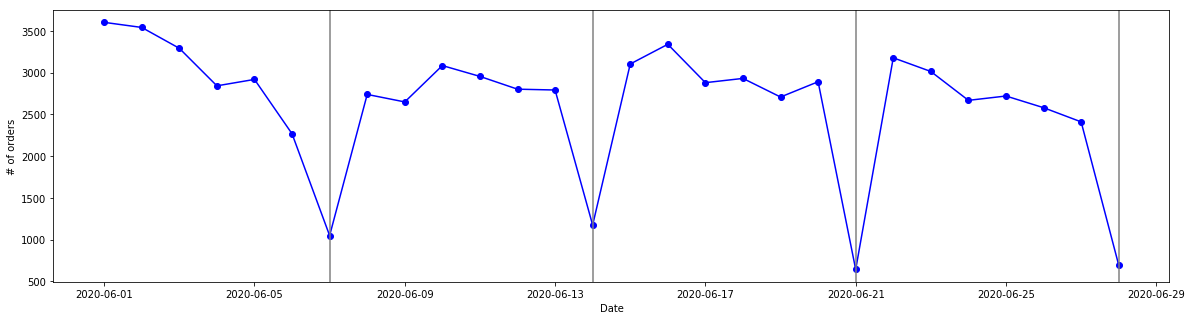

In [49]:
plt.figure(figsize=(20,5))

plt.plot(time_return, color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('# of orders')
plt.axvline(x=pd.to_datetime('2020-06-07'), color='0.5')
plt.axvline(x=pd.to_datetime('2020-06-14'), color='0.5')
plt.axvline(x=pd.to_datetime('2020-06-21'), color='0.5')
plt.axvline(x=pd.to_datetime('2020-06-28'), color='0.5')
plt.show()

There are noticeable dips in the data on the following days: June 7, 14, 21 and 28, all on Sunday. 
The vertical line is on a Sunday, separating the data by week.

In [57]:
time_return.groupby(time_return.index.dayofweek).mean()

time_for_return
0          3157.00
1          3137.25
2          2982.25
3          2863.00
4          2753.25
5          2591.00
6           889.50

0 - Monday, 6 - Sunday

Mondays and Tuesdays have the most return orders, though that may just be because more deliveries are done on those days. 

Let's look at orders that have timestamps for most or all of the columns to get an idea of the return process.

In [63]:
data.loc[451]

order_number                                452
order_status                           returned
misrouted                                   NaN
order_active                                  0
time_for_return             2020-06-12 14:21:27
time_rm_sorting_entry       2020-06-18 15:37:34
time_rm_sorted              2020-06-18 18:43:47
time_rm_sorting_exit        2020-06-19 02:00:29
time_arrived_at_rts_area    2020-06-19 12:34:15
time_arrived_at_rts_hub     2020-06-19 12:57:47
time_failed_return          2020-06-20 17:06:41
time_returned               2020-06-22 11:05:24
origin_region                           Visayas
origin_province                            Cebu
destination_region                 Metro Manila
destination_province               Metro Manila
Name: 451, dtype: object

In [25]:
data.loc[1814]

order_number                               1815
order_status                           returned
misrouted                                   NaN
order_active                                  0
time_for_return             2020-06-09 19:30:31
time_rm_sorting_entry       2020-06-10 07:21:16
time_rm_sorted              2020-06-10 18:52:09
time_rm_sorting_exit        2020-06-11 02:32:07
time_arrived_at_rts_area    2020-06-18 12:57:01
time_arrived_at_rts_hub     2020-06-18 15:44:59
time_failed_return          2020-07-04 16:27:51
time_returned               2020-07-06 13:56:42
origin_region                       South Luzon
origin_province                          Laguna
destination_region                 Metro Manila
destination_province               Metro Manila
Name: 1814, dtype: object

In [15]:
data.loc[54]

order_number                                 55
order_status                           returned
misrouted                                   NaN
order_active                                  0
time_for_return             2020-06-06 18:34:31
time_rm_sorting_entry       2020-06-07 08:03:12
time_rm_sorted              2020-06-07 09:48:27
time_rm_sorting_exit        2020-06-08 02:08:54
time_arrived_at_rts_area    2020-06-08 04:23:38
time_arrived_at_rts_hub     2020-06-08 04:48:00
time_failed_return                          NaT
time_returned               2020-06-08 13:19:56
origin_region                      Metro Manila
origin_province                    Metro Manila
destination_region                 Metro Manila
destination_province               Metro Manila
Name: 54, dtype: object

In [21]:
data.loc[118]

order_number                                119
order_status                           returned
misrouted                                   NaN
order_active                                  0
time_for_return             2020-06-08 19:42:20
time_rm_sorting_entry                       NaT
time_rm_sorted              2020-06-09 08:40:23
time_rm_sorting_exit        2020-06-10 04:09:15
time_arrived_at_rts_area    2020-06-10 07:24:23
time_arrived_at_rts_hub     2020-06-10 07:27:45
time_failed_return          2020-06-10 14:46:54
time_returned               2020-06-11 11:00:17
origin_region                      Metro Manila
origin_province                    Metro Manila
destination_region                  North Luzon
destination_province                   Pampanga
Name: 118, dtype: object

How long does it take for an item to get sorted? 
What happens to misrouted items? 

In [5]:
data_sort = data[['order_number', 'time_for_return','time_rm_sorting_entry','time_rm_sorted','time_rm_sorting_exit',
                  'destination_region','destination_province','order_status']].dropna()

In [6]:
data_sort['length_return_to_sorting_entry'] = data_sort['time_rm_sorting_entry']-data_sort['time_for_return']

In [7]:
data_sort[data_sort['length_return_to_sorting_entry'] < datetime.timedelta(0, 0, 0)]

order_number     time_for_return time_rm_sorting_entry  \
65486         65487 2020-06-26 13:52:15   2020-06-18 14:02:39   

           time_rm_sorted time_rm_sorting_exit destination_region  \
65486 2020-06-18 18:30:50  2020-06-18 23:29:24        North Luzon   

      destination_province order_status length_return_to_sorting_entry  
65486             Pampanga     returned              -8 days +00:10:24

Odd. There's one entry where time_for_return is greater than time_rm_sorting_entry. We'll drop this row.

In [8]:
data_sort = data_sort.drop(index=65486)

In [156]:
print(data_sort['length_return_to_sorting_entry'].describe())

count                     64107
mean     6 days 01:41:12.539956
std      5 days 10:00:12.726583
min             0 days 00:01:03
25%      1 days 12:10:40.500000
50%             4 days 12:59:47
75%             9 days 19:16:52
max            36 days 18:05:43
Name: length_return_to_sorting_entry, dtype: object


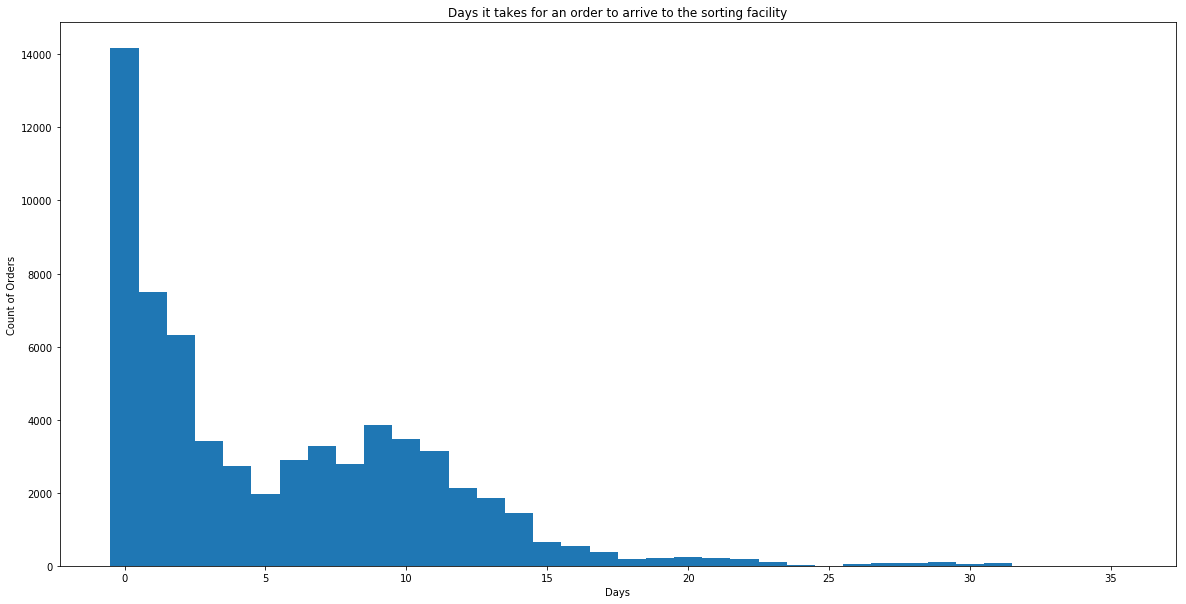

In [157]:
data_sort['length_return_to_sorting_entry'].dt.days.value_counts()

plt.figure(figsize=(20,10))

plt.hist(x=data_sort['length_return_to_sorting_entry'].dt.days,bins=np.arange(37), align='left')
plt.xlabel('Days')
plt.ylabel('Count of Orders')
plt.title('Days it takes for an order to arrive to the sorting facility')
plt.show()

[Text(0, 0.5, 'Number of Orders'), Text(0.5, 0, 'Days')]

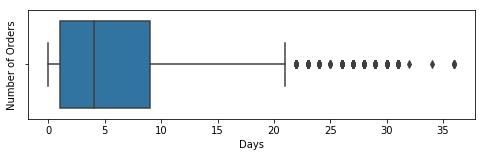

In [158]:
plt.figure(figsize=(8,2))
ax = sns.boxplot(x=data_sort['length_return_to_sorting_entry'].dt.days)
ax.set(xlabel='Days', ylabel='Number of Orders')

In [159]:
data_sort['length_return_to_sorting_entry'].dt.days.value_counts()/len(data_sort)*100

0     22.105230
1     11.688271
2      9.861638
9      5.999345
10     5.415945
3      5.309873
7      5.128925
11     4.907420
6      4.515888
8      4.350539
4      4.242906
12     3.302291
5      3.083907
13     2.884240
14     2.244685
15     1.031089
16     0.837662
17     0.578720
20     0.388413
21     0.338497
19     0.333817
18     0.291700
22     0.271421
23     0.176268
29     0.162229
28     0.135711
31     0.126351
27     0.102953
30     0.063956
26     0.060836
24     0.035878
36     0.010919
25     0.009359
34     0.001560
32     0.001560
Name: length_return_to_sorting_entry, dtype: float64

An item can get to the sorting facility less than a day, but often takes 4 days to arrive (median value). This may be affected by the distance between the destination area and the sorting facility, so we'll check later to see how the region affects the speed at which it gets to the sorting area.


In [160]:
data_sort[data_sort['length_return_to_sorting_entry'] > datetime.timedelta(21, 0, 0)]

order_number     time_for_return time_rm_sorting_entry  \
775             776 2020-06-10 21:42:58   2020-07-08 07:36:15   
1497           1498 2020-06-10 09:52:21   2020-07-09 09:33:13   
2937           2938 2020-06-11 18:08:44   2020-07-08 07:36:15   
3625           3626 2020-06-19 16:26:54   2020-07-14 11:56:37   
5745           5746 2020-06-16 19:25:28   2020-07-08 07:10:57   
...             ...                 ...                   ...   
73279         73280 2020-06-05 13:57:07   2020-06-28 14:30:04   
73291         73292 2020-06-05 15:55:34   2020-07-03 08:40:19   
73316         73317 2020-06-04 18:46:07   2020-06-26 13:40:46   
73329         73330 2020-06-03 15:33:17   2020-07-03 08:40:36   
73332         73333 2020-06-05 13:44:15   2020-06-28 14:30:01   

           time_rm_sorted time_rm_sorting_exit destination_region  \
775   2020-07-08 13:12:32  2020-07-08 13:12:52       Metro Manila   
1497  2020-07-09 14:25:58  2020-07-09 14:29:27        South Luzon   
2937  2020-07-08 10:38:41  2020-07-08 13:08:34       Metro Manila   
3625  2020-07-14 14:31:04  2020-07-14 14:31:48       Metro Manila   
5745  2020-07-08 11:01:03  2020-07-09 02:15:54       Metro Manila   
...                   ...                  ...                ...   
73279 2020-06-28 18:20:14  2020-06-30 05:55:31        South Luzon   
73291 2020-07-04 09:50:52  2020-07-04 09:52:03        South Luzon   
73316 2020-06-26 19:18:53  2020-06-30 01:34:45        South Luzon   
73329 2020-07-03 13:47:02  2020-07-04 00:44:07        South Luzon   
73332 2020-07-12 12:30:52  2020-07-12 12:31:30        South Luzon   

      destination_province         order_status length_return_to_sorting_entry  
775           Metro Manila             returned               27 days 09:53:17  
1497                Laguna           for_claims               28 days 23:40:52  
2937          Metro Manila             returned               26 days 13:27:31  
3625          Metro Manila       out_for_return               24 days 19:29:43  
5745          Metro Manila             returned               21 days 11:45:29  
...                    ...                  ...                            ...  
73279               Laguna    claims_in_transit               23 days 00:32:57  
73291               Laguna  arrived_at_rts_area               27 days 16:44:45  
73316               Laguna             returned               21 days 18:54:39  
73329               Laguna    claims_in_transit               29 days 17:07:19  
73332               Laguna    claims_in_transit               23 days 00:45:46  

[960 rows x 9 columns]

The table above lists the outliers in the dataset. These orders take about a month to arrive at the facility.

Now lets check how arrival time gets affected by region. We'll also see how the distance between seller and buyer could affects things. 

In [161]:
data_sort.groupby(['destination_region']).describe()

order_number                                              \
                          count          mean           std    min      25%   
destination_region                                                            
Metro Manila            38437.0  37343.488071  21065.498606    6.0  19350.0   
Mindanao                 1041.0  41093.086455  21096.489229  543.0  22677.0   
North Luzon              1171.0  38410.541418  21191.487571   72.0  19473.0   
South Luzon             23149.0  35856.959653  20940.274501    1.0  17122.0   
Visayas                   309.0  37560.343042  19381.891016   13.0  22773.0   

                                              length_return_to_sorting_entry  \
                        50%      75%      max                          count   
destination_region                                                             
Metro Manila        37223.0  55921.0  73493.0                          38437   
Mindanao            43573.0  58536.0  73166.0                           1041   
North Luzon         38969.0  59368.5  73364.0                           1171   
South Luzon         35460.0  53907.0  73492.0                          23149   
Visayas             34422.0  52622.0  72334.0                            309   

                                                                    \
                                      mean                     std   
destination_region                                                   
Metro Manila        5 days 13:00:31.420506  5 days 12:06:56.864505   
Mindanao            4 days 03:11:04.513928  4 days 17:42:13.691409   
North Luzon         5 days 14:27:32.393680  5 days 19:14:27.329895   
South Luzon         7 days 01:54:21.658127  5 days 02:56:36.948061   
Visayas             4 days 11:32:40.430420  4 days 17:11:38.027367   

                                                                       \
                                min              25%              50%   
destination_region                                                      
Metro Manila        0 days 00:02:50  0 days 20:23:39  2 days 21:42:52   
Mindanao            0 days 02:42:28  0 days 17:30:30  1 days 15:31:39   
North Luzon         0 days 02:14:43  0 days 20:01:44  2 days 17:25:20   
South Luzon         0 days 00:01:03  2 days 18:28:29  6 days 04:06:20   
Visayas             0 days 06:38:38  0 days 19:44:40  1 days 19:48:59   

                                                        
                                 75%               max  
destination_region                                      
Metro Manila         9 days 15:49:17  36 days 18:05:43  
Mindanao             6 days 20:02:17  23 days 00:32:43  
North Luzon          9 days 17:59:59  31 days 17:03:06  
South Luzon         10 days 14:21:04  31 days 16:20:25  
Visayas              8 days 15:37:26  31 days 16:05:51

All regions have orders that take more than 20 days to arrive at the sorting facility. 

[Text(0, 0.5, 'Destination Region'), Text(0.5, 0, 'Days')]

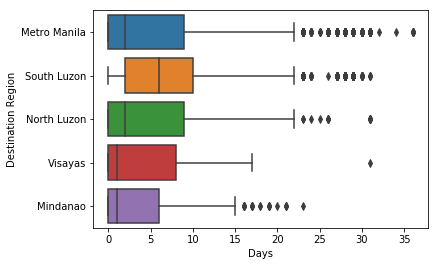

In [162]:
ax = sns.boxplot(x=data_sort['length_return_to_sorting_entry'].dt.days, y=data["destination_region"], 
                order=['Metro Manila', 'South Luzon', 'North Luzon', 'Visayas', 'Mindanao'])
ax.set(xlabel='Days', ylabel='Destination Region')

South Luzon is noticeably behind.

In [9]:
data_sort['length_return_to_sorting_entry'] = data_sort['length_return_to_sorting_entry'].dt.days

[Text(0, 0.5, 'Destination Province'), Text(0.5, 0, 'Days')]

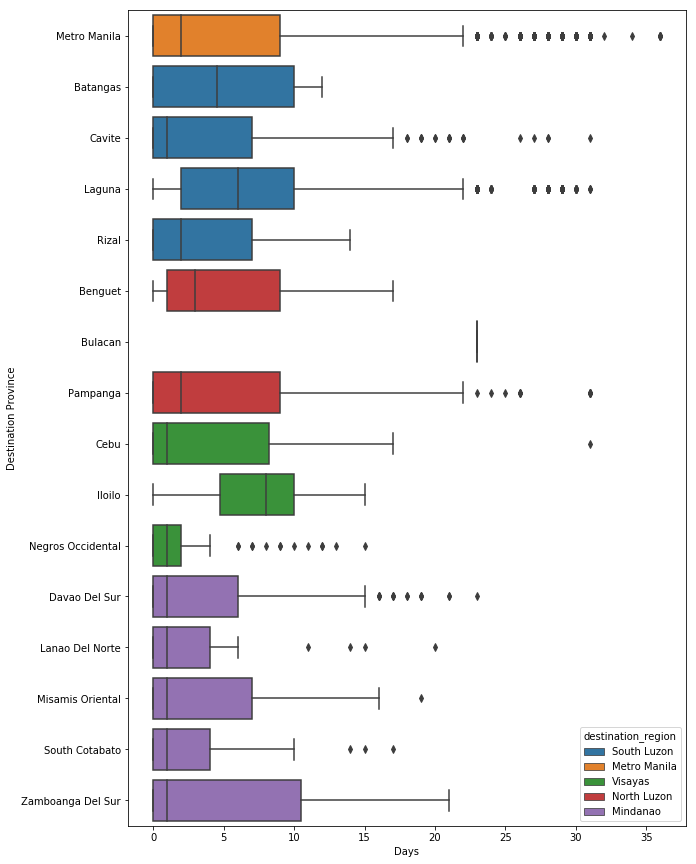

In [211]:
plt.figure(figsize=(10,15))
ax = sns.boxplot(data = data_sort, x='length_return_to_sorting_entry', y="destination_province",
                 hue = "destination_region", dodge=False,
                 order=['Metro Manila', 'Batangas', 'Cavite', 'Laguna', 
                                                            'Rizal','Benguet','Bulacan','Pampanga',
                                                           'Cebu', 'Iloilo', 'Negros Occidental',
                                                           'Davao Del Sur', 'Lanao Del Norte', 'Misamis Oriental','South Cotabato','Zamboanga Del Sur'])
ax.set(xlabel='Days', ylabel='Destination Province')

In [192]:
data_sort.groupby(['destination_region','destination_province']).describe()

length_return_to_sorting_entry  \
                                                                 count   
destination_region destination_province                                  
Metro Manila       Metro Manila                                  38437   
Mindanao           Davao Del Sur                                   591   
                   Lanao Del Norte                                  19   
                   Misamis Oriental                                314   
                   South Cotabato                                   75   
                   Zamboanga Del Sur                                42   
North Luzon        Benguet                                          38   
                   Bulacan                                           1   
                   Pampanga                                       1132   
South Luzon        Batangas                                         16   
                   Cavite                                         1029   
                   Laguna                                        22035   
                   Rizal                                            69   
Visayas            Cebu                                            192   
                   Iloilo                                           28   
                   Negros Occidental                                89   

                                                                \
                                                          mean   
destination_region destination_province                          
Metro Manila       Metro Manila         5 days 13:00:31.420506   
Mindanao           Davao Del Sur        4 days 03:24:02.101522   
                   Lanao Del Norte      4 days 09:05:04.263157   
                   Misamis Oriental     4 days 02:48:17.442675   
                   South Cotabato       3 days 10:34:34.573333   
                   Zamboanga Del Sur    5 days 05:58:22.523809   
North Luzon        Benguet              5 days 05:28:05.184210   
                   Bulacan                    23 days 00:45:41   
                   Pampanga             5 days 14:23:28.635159   
South Luzon        Batangas             5 days 10:46:36.312500   
                   Cavite               4 days 11:34:42.314868   
                   Laguna               7 days 05:02:52.824461   
                   Rizal                4 days 09:05:08.608695   
Visayas            Cebu                 4 days 19:03:19.270833   
                   Iloilo               7 days 23:41:27.964285   
                   Negros Occidental    2 days 16:52:06.404494   

                                                                \
                                                           std   
destination_region destination_province                          
Metro Manila       Metro Manila         5 days 12:06:56.864505   
Mindanao           Davao Del Sur        4 days 20:51:48.450995   
                   Lanao Del Norte      6 days 04:55:18.069659   
                   Misamis Oriental     4 days 10:20:25.019265   
                   South Cotabato       3 days 22:52:36.418719   
                   Zamboanga Del Sur    5 days 13:35:13.015519   
North Luzon        Benguet              4 days 21:27:01.830437   
                   Bulacan                                 NaT   
                   Pampanga             5 days 19:27:20.293524   
South Luzon        Batangas             4 days 19:54:56.197580   
                   Cavite               5 days 02:15:44.020339   
                   Laguna               5 days 02:12:26.533927   
                   Rizal                4 days 06:43:43.679544   
Visayas            Cebu                 4 days 23:10:44.738833   
                   Iloilo               3 days 23:46:53.557767   
                   Negros Occidental    3 days 11:34:10.439484   

                                                          \
                                                     min   
des

[Text(0, 0.5, 'South Luzon'), Text(0.5, 0, 'Days')]

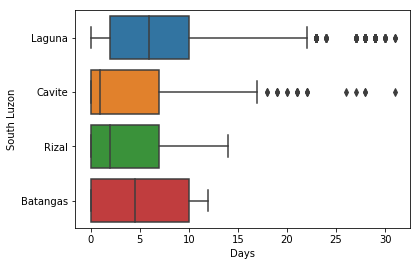

In [217]:
ax = sns.boxplot(data = data_sort[data_sort['destination_region']=='South Luzon'], x='length_return_to_sorting_entry', y="destination_province",)
ax.set(xlabel='Days', ylabel='South Luzon')

[Text(0, 0.5, 'Visayas'), Text(0.5, 0, 'Days')]

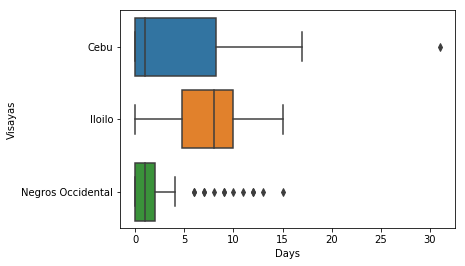

In [218]:
ax = sns.boxplot(data = data_sort[data_sort['destination_region']=='Visayas'], x='length_return_to_sorting_entry', y="destination_province",)
ax.set(xlabel='Days', ylabel='Visayas')

In [224]:
data_sort[data_sort['length_return_to_sorting_entry'] > 21].count()/len(data_sort)*100

time_for_return                   1.159
time_rm_sorting_entry             1.159
time_rm_sorted                    1.159
time_rm_sorting_exit              1.159
destination_region                1.159
destination_province              1.159
length_return_to_sorting_entry    1.159
dtype: float64

It may not be worth it to look into orders that take greater than 21 days to arrive, since it's only 1% of the orders.

In [26]:
data_sort['order_status'].value_counts()

returned                     56925
claims_in_transit             3972
claimed                        886
arrived_at_claims_area         829
arrived_at_rts_hub             659
return_in_transit              317
arrived_at_rts_area            285
out_for_return                  68
for_claims                      62
disposed                        57
at_sorting_center_rts           36
failed_return                    8
delivered                        2
received_at_delivery_area        1
Name: order_status, dtype: int64

In [29]:
data_sort[data_sort['length_return_to_sorting_entry'] > 21]['order_status'].value_counts()

returned                  463
claims_in_transit         174
arrived_at_claims_area     81
claimed                     8
arrived_at_rts_area         7
for_claims                  4
return_in_transit           3
at_sorting_center_rts       2
out_for_return              1
Name: order_status, dtype: int64

Let's examine the amount of time spent in a sorting facility.

In [10]:
data_sort['length_in_sorting_facility'] = data_sort['time_rm_sorting_exit']-data_sort['time_rm_sorting_entry']

In [11]:
data_sort[data_sort['length_in_sorting_facility'] < datetime.timedelta(0, 0, 0)]

order_number     time_for_return time_rm_sorting_entry  \
6157           6158 2020-06-08 12:37:47   2020-06-28 14:22:12   
14861         14862 2020-06-07 17:12:48   2020-07-09 09:33:13   
71614         71615 2020-06-26 19:23:23   2020-07-13 14:05:33   

           time_rm_sorted time_rm_sorting_exit destination_region  \
6157  2020-06-16 13:17:37  2020-06-16 13:18:24       Metro Manila   
14861 2020-06-09 08:43:38  2020-06-10 23:21:45        South Luzon   
71614 2020-07-01 14:17:49  2020-07-01 14:18:46       Metro Manila   

      destination_province           order_status  \
6157          Metro Manila               returned   
14861               Laguna  at_sorting_center_rts   
71614         Metro Manila               returned   

      length_return_to_sorting_entry length_in_sorting_facility  
6157                20 days 01:44:25         -13 days +22:56:12  
14861               31 days 16:20:25         -29 days +13:48:32  
71614               16 days 18:42:10         -12 days +00:13:13

In [12]:
data_sort = data_sort.drop(index=[6157,14861,71614])

In [15]:
data_sort['length_in_sorting_facility'].describe()

count                     64104
mean     1 days 02:34:25.474494
std      1 days 01:57:46.981275
min             0 days 00:01:08
25%             0 days 15:07:34
50%             0 days 18:24:25
75%             1 days 04:28:41
max            38 days 09:07:53
Name: length_in_sorting_facility, dtype: object

[Text(0, 0.5, 'Destination Region'), Text(0.5, 0, 'Days')]

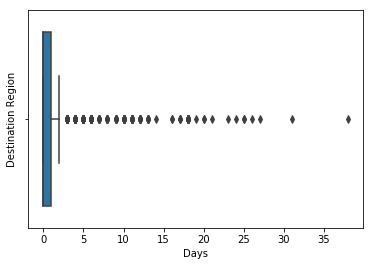

In [238]:
ax = sns.boxplot(x=data_sort['length_in_sorting_facility'].dt.days)
ax.set(xlabel='Days', ylabel='Destination Region')

In [245]:
data_sort['length_in_sorting_facility'][data_sort['length_in_sorting_facility'] > datetime.timedelta(2, 0, 0)].count()/len(data_sort) * 100

12.646636715337575

12.65% of orders spend more than 2 days in the sorting facility. 

In [248]:
data_sort['length_in_sorting_facility'][data_sort['length_in_sorting_facility'] > datetime.timedelta(5, 0, 0)].count()/len(data_sort) * 100

0.6177461624859603

Most orders don't spend more than a week though. The outliers account for less than 1% of the orders so it's not worth spending time on them.
On average orders spend a day in the sorting facility.

Now let's see how long it takes to sort items.

In [13]:
data_sort['length_sorting'] = data_sort['time_rm_sorted']-data_sort['time_rm_sorting_entry']

In [17]:
data_sort['length_sorting'].describe()

count                     64104
mean     0 days 08:14:17.708660
std      0 days 15:04:58.726208
min             0 days 00:00:31
25%      0 days 04:32:28.500000
50%             0 days 07:18:35
75%             0 days 09:58:41
max            38 days 09:07:04
Name: length_sorting, dtype: object

[Text(0, 0.5, 'Time Spent Sorting'),
 Text(0.5, 0, 'Time Spent Sorting in Seconds')]

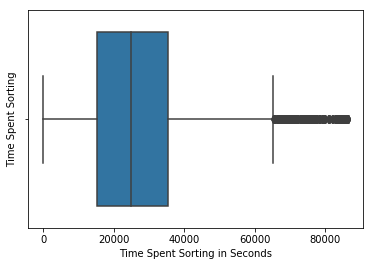

In [251]:
ax = sns.boxplot(x=data_sort['length_sorting'].dt.seconds)
ax.set(xlabel='Time Spent Sorting in Seconds', ylabel='Time Spent Sorting')

It takes an item about 7 hours and 18 minutes to get sorted. Note that I often take the median because of the presence of outliers.

In [14]:
data_sort['length_after_sorting'] = data_sort['time_rm_sorting_exit']-data_sort['time_rm_sorted']

In [19]:
data_sort[data_sort['length_after_sorting'] < datetime.timedelta(0, 0, 0)]

time_for_return time_rm_sorting_entry      time_rm_sorted  \
16135 2020-06-12 17:43:23   2020-06-26 13:41:00 2020-07-03 09:35:00   
16145 2020-06-12 18:26:14   2020-06-27 14:04:46 2020-07-03 09:35:02   
19193 2020-06-26 18:24:59   2020-06-27 09:33:54 2020-07-03 09:35:02   
48020 2020-06-11 18:22:13   2020-06-27 14:04:46 2020-07-03 09:35:01   
56389 2020-06-26 21:55:10   2020-06-29 09:13:49 2020-07-07 17:46:42   
56532 2020-06-12 20:21:11   2020-06-26 14:45:54 2020-07-03 09:34:59   
58310 2020-06-12 15:53:27   2020-06-26 13:42:43 2020-07-03 09:34:59   
58340 2020-06-12 18:48:00   2020-06-27 14:04:46 2020-07-03 09:35:01   
59004 2020-06-26 21:55:10   2020-06-29 09:13:49 2020-07-07 17:46:42   
61398 2020-06-27 21:12:46   2020-06-29 09:13:49 2020-07-07 17:46:42   
64432 2020-06-27 21:12:46   2020-06-29 09:13:49 2020-07-07 17:46:42   
70200 2020-06-27 19:11:07   2020-06-29 09:13:49 2020-07-07 17:46:42   
70303 2020-06-26 21:55:10   2020-06-29 09:13:49 2020-07-07 18:09:44   
72995 2020-06-27 21:12:46   2020-06-29 09:13:49 2020-07-07 17:46:42   

      time_rm_sorting_exit destination_region destination_province  \
16135  2020-06-27 14:26:06        South Luzon               Laguna   
16145  2020-06-27 14:26:06        South Luzon               Laguna   
19193  2020-06-27 14:26:06        South Luzon               Laguna   
48020  2020-06-27 14:26:06        South Luzon               Laguna   
56389  2020-07-02 10:55:06        South Luzon               Laguna   
56532  2020-06-27 14:26:06        South Luzon               Laguna   
58310  2020-06-27 14:26:06        South Luzon               Laguna   
58340  2020-06-27 14:26:06        South Luzon               Laguna   
59004  2020-07-02 10:55:06        South Luzon               Laguna   
61398  2020-07-02 10:55:06        South Luzon               Laguna   
64432  2020-07-02 10:55:06        South Luzon               Laguna   
70200  2020-07-02 10:55:06        South Luzon               Laguna   
70303  2020-07-02 10:55:06        South Luzon               Laguna   
72995  2020-07-02 10:55:06        South Luzon               Laguna   

       length_return_to_sorting_entry length_in_sorting_facility  \
16135                              13            1 days 00:45:06   
16145                              14            0 days 00:21:20   
19193                               0            0 days 04:52:12   
48020                              15            0 days 00:21:20   
56389                               2            3 days 01:41:17   
56532                              13            0 days 23:40:12   
58310                              13            1 days 00:43:23   
58340                              14            0 days 00:21:20   
59004                               2            3 days 01:41:17   
61398                               1            3 days 01:41:17   
64432                               1            3 days 01:41:17   
70200                               1            3 days 01:41:17   
70303                               2            3 days 01:41:17   
72995                               1            3 days 01:41:17   

       length_sorting length_after_sorting  
16135 6 days 19:54:00    -6 days +04:51:06  
16145 5 days 19:30:16    -6 days +04:51:04  
19193 6 days 00:01:08    -6 days +04:51:04  
48020 5 days 19:30:15    -6 days +04:51:05  
56389 8 days 08:32:53    -6 days +17:08:24  
56532 6 days 18:49:05    -6 days +04:51:07  
58310 6 days 19:52:16    -6 days +04:51:07  
58340 5 days 19:30:15    -6 days +04:51:05  
59004 8 days 08:32:53    -6 days +17:08:24  
61398 8 days 08:32:53    -6 days +17:08:24  
64432 8 days 08:32:53    -6 days +17:08:24  
70200 8 days 08:32:53    -6 days +17:08:24  
70303 8 days 08:55:55    -6 days +16:45:22  
72995 8 days 08:32:53    -6 days +17:08:24

In [15]:
data_sort = data_sort.drop(index=data_sort[data_sort['length_after_sorting'] < datetime.timedelta(0, 0, 0)].index)

In [258]:
data_sort['length_after_sorting'].describe()

count                     64090
mean     0 days 18:22:06.800078
std      0 days 22:29:43.357481
min             0 days 00:00:17
25%             0 days 07:30:03
50%             0 days 08:40:16
75%             0 days 18:15:41
max            17 days 23:27:38
Name: length_after_sorting, dtype: object

There's a waiting time of about 8:40 hours until a sorted order leaves the facility.

[Text(0.5, 0, 'Time Spent Waiting After Getting Sorted in Seconds')]

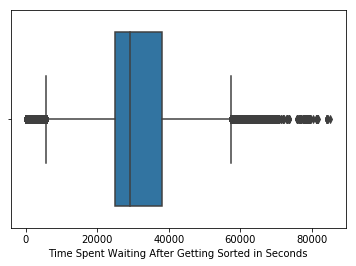

In [261]:
ax = sns.boxplot(x=data_sort['length_after_sorting'].dt.seconds)
ax.set(xlabel='Time Spent Waiting After Getting Sorted in Seconds')

Next we'll see how long it takes for an order to leave to sorting facility and arrive at the rts area.

In [16]:
data_after_sorting = data[data['time_rm_sorting_exit'].notnull()]

In [48]:
len(data_after_sorting) - len(data_after_sorting[data_after_sorting['time_arrived_at_rts_area'].notnull()])

191

In [17]:
no_time = data_after_sorting[data_after_sorting['time_arrived_at_rts_area'].isnull()]
no_time['order_active'].value_counts()

1    105
0     86
Name: order_active, dtype: int64

In [19]:
data_after_sorting['order_active'].value_counts()

0    64165
1     1403
Name: order_active, dtype: int64

Most of the rows with null values for time_arrived_at_rts_area are still active, which explains why it has no timestamp. 

In [58]:
no_time[no_time['order_active']==0]

order_number order_status  misrouted  order_active     time_for_return  \
718             719     returned        NaN             0 2020-06-22 17:13:13   
779             780      claimed        NaN             0 2020-06-25 14:36:17   
5585           5586      claimed        NaN             0 2020-06-13 16:01:17   
5588           5589      claimed        NaN             0 2020-06-13 17:12:03   
5612           5613      claimed        NaN             0 2020-06-15 16:27:25   
...             ...          ...        ...           ...                 ...   
67877         67878      claimed        NaN             0 2020-06-20 17:00:28   
68003         68004      claimed        NaN             0 2020-06-13 16:01:17   
68071         68072      claimed        NaN             0 2020-06-18 16:13:42   
72335         72336     returned        NaN             0 2020-06-03 19:46:17   
73141         73142      claimed        NaN             0 2020-06-22 15:08:04   

      time_rm_sorting_entry      time_rm_sorted time_rm_sorting_exit  \
718     2020-06-30 08:32:19 2020-06-30 18:47:53  2020-07-01 07:51:10   
779     2020-07-07 07:14:14 2020-07-08 13:18:06  2020-07-08 13:19:20   
5585    2020-07-02 07:04:11 2020-07-02 08:07:33  2020-07-02 08:08:48   
5588    2020-07-02 07:04:11 2020-07-02 08:07:33  2020-07-02 08:08:48   
5612    2020-07-04 08:30:52 2020-07-04 09:56:33  2020-07-04 09:57:17   
...                     ...                 ...                  ...   
67877   2020-07-02 07:04:03 2020-07-02 08:07:33  2020-07-02 08:08:48   
68003   2020-07-02 07:04:11 2020-07-02 08:07:32  2020-07-02 08:08:48   
68071   2020-07-04 08:31:13 2020-07-04 09:56:33  2020-07-04 09:57:17   
72335   2020-06-08 07:43:17 2020-06-08 08:59:18  2020-06-09 03:16:45   
73141   2020-07-07 07:49:08 2020-07-07 16:05:30  2020-07-08 05:10:18   

      time_arrived_at_rts_area time_arrived_at_rts_hub time_failed_return  \
718                        NaT     2020-07-03 03:11:52                NaT   
779                        NaT                     NaT                NaT   
5585                       NaT                     NaT                NaT   
5588                       NaT                     NaT                NaT   
5612                       NaT                     NaT                NaT   
...                        ...                     ...                ...   
67877                      NaT                     NaT                NaT   
68003                      NaT                     NaT                NaT   
68071                      NaT                     NaT                NaT   
72335                      NaT     2020-06-09 10:31:47                NaT   
73141                      NaT                     NaT                NaT   

            time_returned origin_region    origin_province destination_region  \
718   2020-07-03 12:04:01      Mindanao     South Cotabato            Visayas   
779                   NaT      Mindanao      Davao Del Sur           Mindanao   
5585                  NaT      Mindanao     Sultan Kudarat       Metro Manila   
5588                  NaT      Mindanao     South Cotabato       Metro Manila   
5612                  NaT      Mindanao    Davao Del Norte       Metro Manila   
...                   ...           ...                ...                ...   
67877                 NaT      Mindanao    Davao Del Norte           Mindanao   
68003                 NaT      Mindanao     Sultan Kudarat       Metro Manila   
68071                 NaT      Mindanao      Davao Del Sur       Metro Manila   
72335 2020-06-11 13:04:58  Metro Manila       Metro Manila       Metro Manila   
73141                 NaT      Mindanao  Zamboanga Del Sur           Mindanao   

      destination_province  
718      Negros Occidental  
779       Misamis Oriental  
5585          Metro Manila  
5588          Metro Manila  
5612          Metro Manila  
...                    ...  
67877    Zamboanga Del Sur  
68003         Metro Manila  
68071     

In [59]:
no_time[no_time['order_active']==0]['order_status'].value_counts()

claimed     72
returned    14
Name: order_status, dtype: int64

In [63]:
no_time[no_time['time_arrived_at_rts_hub'].notnull()]

order_number        order_status  misrouted  order_active  \
718             719            returned        NaN             0   
14003         14004            returned        NaN             0   
19591         19592            returned        NaN             0   
21923         21924            returned        NaN             0   
23778         23779            returned        NaN             0   
23895         23896            returned        NaN             0   
23897         23898            returned        NaN             0   
37705         37706  arrived_at_rts_hub        NaN             1   
47537         47538            returned        NaN             0   
48449         48450            returned        NaN             0   
49371         49372            returned        NaN             0   
49663         49664            returned        NaN             0   
49748         49749            returned        NaN             0   
51844         51845  arrived_at_rts_hub        NaN             1   
66127         66128            returned        NaN             0   
72335         72336            returned        NaN             0   

          time_for_return time_rm_sorting_entry      time_rm_sorted  \
718   2020-06-22 17:13:13   2020-06-30 08:32:19 2020-06-30 18:47:53   
14003 2020-06-05 15:46:02   2020-06-08 07:45:24 2020-06-08 09:01:06   
19591 2020-06-19 18:37:07   2020-06-30 07:50:57 2020-06-30 18:47:32   
21923 2020-06-22 15:04:47   2020-06-30 08:32:19 2020-06-30 18:47:32   
23778 2020-06-03 20:25:00   2020-06-08 07:45:14 2020-06-08 08:59:00   
23895 2020-06-05 17:18:26   2020-06-08 07:43:13 2020-06-08 09:01:48   
23897 2020-06-05 17:05:37   2020-06-08 07:43:13 2020-06-08 09:01:48   
37705 2020-06-22 17:11:53   2020-06-22 19:42:58 2020-06-22 19:54:18   
47537 2020-06-03 17:53:13   2020-06-08 07:43:17 2020-06-08 09:01:05   
48449 2020-06-18 00:06:21   2020-06-30 08:32:48 2020-06-30 18:51:42   
49371 2020-06-07 19:22:16   2020-06-08 07:43:29 2020-06-08 09:01:48   
49663 2020-06-06 18:51:58   2020-06-08 07:43:17 2020-06-08 09:03:52   
49748 2020-06-05 20:51:33   2020-06-08 07:43:17 2020-06-08 09:01:35   
51844 2020-06-27 18:25:36   2020-06-28 14:22:25 2020-06-28 18:19:35   
66127 2020-06-20 16:37:25   2020-06-30 08:32:13 2020-06-30 18:47:32   
72335 2020-06-03 19:46:17   2020-06-08 07:43:17 2020-06-08 08:59:18   

      time_rm_sorting_exit time_arrived_at_rts_area time_arrived_at_rts_hub  \
718    2020-07-01 07:51:10                      NaT     2020-07-03 03:11:52   
14003  2020-06-09 03:16:46                      NaT     2020-06-09 10:31:48   
19591  2020-07-01 03:43:13                      NaT     2020-07-01 13:11:23   
21923  2020-07-01 03:43:13                      NaT     2020-07-01 13:11:23   
23778  2020-06-09 03:16:46                      NaT     2020-06-09 10:31:48   
23895  2020-06-09 03:16:46                      NaT     2020-06-09 10:31:49   
23897  2020-06-09 03:16:46                      NaT     2020-06-09 10:31:49   
37705  2020-06-22 19:56:56                      NaT     2020-06-28 13:13:06   
47537  2020-06-09 03:16:46                      NaT     2020-06-09 10:31:49   
48449  2020-07-01 07:51:09                      NaT     2020-07-03 03:11:52   
49371  2020-06-09 03:16:46                      NaT     2020-06-09 10:31:47   
49663  2020-06-09 03:16:45                      NaT     2020-06-09 10:31:48   
49748  2020-06-09 03:16:45                      NaT     2020-06-09 10:31:48   
51844  2020-06-29 01:52:04                      NaT     2020-07-02 07:31:16   
66127  2020-07-01 03:43:13                      NaT     2020-07-01 13:11:23   
72335  2020-06-09 03:16:45                      NaT     2020-06-09 10:31:47   

      time_failed_return       time_returned origin_region   origin_province  \
718                  NaT 2020-07-03 12:04:01      Mindanao    South Cotabato   
14003                NaT 2020-06-11 12:29:50   North Luzon           Benguet   
19591                NaT 2020-07-02 11:11:15      Mindanao

In [64]:
len(no_time[no_time['time_arrived_at_rts_hub'].notnull()])

16

Out of 191, 16 orders have a time for when they arrived at the rts hub but not the area. It's likely that this is a data entry error. 

In [18]:
data_after_sorting = data_after_sorting.drop(no_time.index)

In [19]:
data_after_sorting['length_time_to_rts_area'] = data_after_sorting['time_arrived_at_rts_area'] - data_after_sorting['time_rm_sorting_exit']

In [22]:
data_after_sorting[data_after_sorting['length_time_to_rts_area'] < datetime.timedelta(0, 0, 0)]

order_number       order_status  misrouted  order_active  \
13684         13685  return_in_transit        NaN             1   
28135         28136  return_in_transit        1.0             1   
41595         41596  return_in_transit        NaN             1   
45097         45098  return_in_transit        NaN             1   
51992         51993  return_in_transit        NaN             1   
61265         61266  return_in_transit        NaN             1   
62093         62094  return_in_transit        NaN             1   

          time_for_return time_rm_sorting_entry      time_rm_sorted  \
13684 2020-06-03 15:08:17   2020-07-01 10:52:38 2020-07-01 19:28:16   
28135 2020-06-22 20:12:36   2020-06-29 14:04:36 2020-06-30 18:12:47   
41595 2020-06-22 20:12:36   2020-06-29 14:04:36 2020-06-30 18:12:46   
45097 2020-06-22 20:12:36   2020-06-29 14:04:36 2020-06-30 18:12:47   
51992 2020-06-22 20:12:36   2020-06-29 14:04:36 2020-06-30 18:12:47   
61265 2020-06-22 20:12:36   2020-06-29 14:04:36 2020-06-30 18:12:46   
62093 2020-06-22 20:12:36   2020-06-29 14:04:36 2020-06-30 18:12:46   

      time_rm_sorting_exit time_arrived_at_rts_area time_arrived_at_rts_hub  \
13684  2020-07-02 05:08:05      2020-06-11 08:24:35                     NaT   
28135  2020-07-02 00:48:18      2020-06-25 15:25:34                     NaT   
41595  2020-07-02 00:48:18      2020-06-25 15:25:34                     NaT   
45097  2020-07-02 00:48:18      2020-06-25 15:25:34                     NaT   
51992  2020-07-02 00:48:18      2020-06-25 15:25:34                     NaT   
61265  2020-07-02 00:48:18      2020-06-25 15:25:34                     NaT   
62093  2020-07-02 00:48:18      2020-06-25 15:25:34                     NaT   

      time_failed_return time_returned origin_region    origin_province  \
13684                NaT           NaT       Visayas               Cebu   
28135                NaT           NaT      Mindanao           Bukidnon   
41595                NaT           NaT      Mindanao  Surigao Del Norte   
45097                NaT           NaT      Mindanao    Lanao Del Norte   
51992                NaT           NaT   South Luzon   Oriental Mindoro   
61265                NaT           NaT   North Luzon            Benguet   
62093                NaT           NaT       Visayas             Iloilo   

      destination_region destination_province length_time_to_rts_area  
13684       Metro Manila         Metro Manila      -21 days +03:16:30  
28135        South Luzon               Laguna       -7 days +14:37:16  
41595        South Luzon               Laguna       -7 days +14:37:16  
45097        South Luzon               Laguna       -7 days +14:37:16  
51992        South Luzon               Laguna       -7 days +14:37:16  
61265        South Luzon               Laguna       -7 days +14:37:16  
62093        South Luzon               Laguna       -7 days +14:37:16

The data where time_rm_sorting_exit is later than time_arrived_at_rts_area are all active orders. We'll drop them.

In [20]:
data_after_sorting = data_after_sorting.drop(index=data_after_sorting[data_after_sorting['length_time_to_rts_area'] < datetime.timedelta(0, 0, 0)].index)

In [74]:
data_after_sorting['length_time_to_rts_area'].describe()

count                     65370
mean     2 days 07:01:34.458513
std      3 days 19:56:54.339945
min             0 days 00:00:12
25%             0 days 06:24:20
50%             0 days 15:29:11
75%             2 days 09:38:10
max            36 days 23:19:10
Name: length_time_to_rts_area, dtype: object

[Text(0.5, 0, 'Days From Sorting Facility Exit to RTS Area Arrival')]

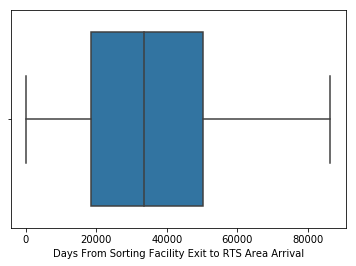

In [113]:
ax = sns.boxplot(x=data_after_sorting['length_time_to_rts_area'].dt.seconds)
ax.set(xlabel='Days From Sorting Facility Exit to RTS Area Arrival')

It typically takes an order 15 hours to arrive to the RTS Area.
I wonder if the outliers are because the seller is not present. Let's filter for rows where there's a failed return.

In [24]:
with_failed_return = data_after_sorting[data_after_sorting['time_failed_return'].notnull()]
no_failed_return = data_after_sorting[data_after_sorting['time_failed_return'].isnull()]

In [81]:
no_failed_return['length_time_to_rts_area'].describe()

count                     64736
mean     2 days 07:07:11.145112
std      3 days 19:59:12.860390
min             0 days 00:00:12
25%             0 days 06:24:28
50%             0 days 15:29:17
75%             2 days 09:44:12
max            36 days 23:19:10
Name: length_time_to_rts_area, dtype: object

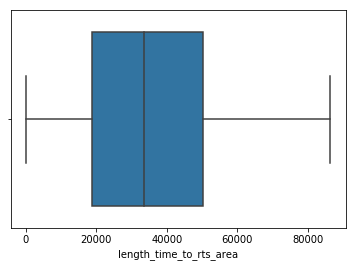

In [112]:
ax = sns.boxplot(x=no_failed_return['length_time_to_rts_area'].dt.seconds)

In [80]:
with_failed_return['length_time_to_rts_area'].describe()

count                       634
mean     1 days 21:28:36.313880
std      3 days 15:28:29.460059
min             0 days 00:26:04
25%             0 days 04:04:57
50%             0 days 07:03:36
75%             1 days 04:48:27
max            23 days 20:18:07
Name: length_time_to_rts_area, dtype: object

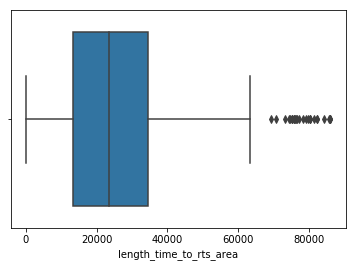

In [111]:
ax = sns.boxplot(x=with_failed_return['length_time_to_rts_area'].dt.seconds)

Looks like it doesn't really affect things.

In [21]:
data_after_sorting = data_after_sorting[data_after_sorting['time_arrived_at_rts_area'].notnull()]

In [22]:
data_after_sorting['length_rts_area_to_hub'] = data_after_sorting['time_arrived_at_rts_hub'] - data_after_sorting['time_arrived_at_rts_area']

In [23]:
data_after_sorting[data_after_sorting['length_rts_area_to_hub'] < datetime.timedelta(0, 0, 0)]

order_number            order_status  misrouted  order_active  \
1487           1488                returned        NaN             0   
4629           4630                returned        NaN             0   
4921           4922                returned        NaN             0   
5009           5010                returned        NaN             0   
5060           5061       claims_in_transit        NaN             0   
5736           5737       claims_in_transit        NaN             0   
5799           5800  arrived_at_claims_area        NaN             0   
6047           6048                 claimed        NaN             0   
6114           6115                 claimed        NaN             0   
6157           6158                returned        NaN             0   
8197           8198                returned        NaN             0   
16814         16815       claims_in_transit        NaN             0   
17178         17179  arrived_at_claims_area        NaN             0   
20538         20539                returned        NaN             0   
20710         20711  arrived_at_claims_area        NaN             0   
21213         21214                returned        NaN             0   
25716         25717                 claimed        NaN             0   
25909         25910                returned        NaN             0   
25910         25911                returned        NaN             0   
26094         26095                returned        NaN             0   
26100         26101                returned        NaN             0   
26575         26576     arrived_at_rts_area        NaN             1   
28143         28144                returned        NaN             0   
32064         32065                returned        NaN             0   
32149         32150                returned        NaN             0   
36405         36406                returned        NaN             0   
36412         36413                returned        NaN             0   
36413         36414                returned        NaN             0   
39462         39463                returned        NaN             0   
42019         42020                returned        NaN             0   
42125         42126                 claimed        NaN             0   
42215         42216                returned        NaN             0   
46833         46834       claims_in_transit        NaN             0   
47291         47292       claims_in_transit        NaN             0   
47472         47473  arrived_at_claims_area        NaN             0   
50840         50841       claims_in_transit        NaN             0   
50844         50845       claims_in_transit        NaN             0   
50847         50848       claims_in_transit        NaN             0   
50849         50850       claims_in_transit        NaN             0   
50854         50855       claims_in_transit        NaN             0   
55301         55302                returned        NaN             0   
56217         56218                 claimed        NaN             0   
58646         58647                returned        NaN             0   
59158         59159                returned        NaN             0   
59901         59902                returned        NaN             0   
64806         64807                returned        NaN             0   
65280         65281                returned        NaN             0   
65486         65487                returned        NaN             0   
66633         66634       claims_in_transit        NaN             0   
69038         69039                returned        NaN             0   
69239         69240                returned        NaN             0   
69812         69813                 claimed        NaN             0   
73359         73360                returned        NaN             0   

          time_for_return time_rm_sorting_entry      time_rm_sorted  \
1487  2020-06-09 14:22:54   2020-06-28 14:22:12

In [24]:
data_after_sorting = data_after_sorting.drop(index=data_after_sorting[data_after_sorting['length_rts_area_to_hub'] < datetime.timedelta(0, 0, 0)].index)

In [98]:
data_after_sorting['length_rts_area_to_hub'].describe()

count                     36657
mean     0 days 17:46:42.599176
std      1 days 15:23:53.914757
min             0 days 00:00:09
25%             0 days 00:14:00
50%             0 days 01:15:55
75%             1 days 01:40:55
max            29 days 03:14:42
Name: length_rts_area_to_hub, dtype: object

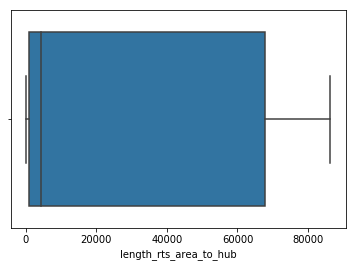

In [102]:
ax = sns.boxplot(x=data_after_sorting['length_rts_area_to_hub'].dt.seconds)

In [110]:
data_after_sorting[data_after_sorting['length_rts_area_to_hub'] > datetime.timedelta(2, 0, 0)]['length_rts_area_to_hub'].count()/data_after_sorting['length_rts_area_to_hub'].count()*100

8.183975775431705

8% of orders take more than two days for the item at the origin warehouse to get scanned.

In [25]:
data_after_sorting['length_rts_area_to_hub'] = data_after_sorting['time_arrived_at_rts_hub'] - data_after_sorting['time_arrived_at_rts_area']

In [26]:
successful_return = data_after_sorting[data_after_sorting['time_returned'].notnull()]

In [27]:
successful_return['length_to_return'] = successful_return['time_returned'] - successful_return['time_arrived_at_rts_hub']

/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
successful_return[successful_return['length_to_return'] < datetime.timedelta(0, 0, 0)]

order_number order_status  misrouted  order_active     time_for_return  \
24055         24056     returned        NaN             0 2020-06-15 17:18:22   
50292         50293     returned        NaN             0 2020-06-06 17:57:04   

      time_rm_sorting_entry      time_rm_sorted time_rm_sorting_exit  \
24055   2020-06-16 08:31:37 2020-06-16 18:40:05  2020-06-17 03:07:26   
50292   2020-06-16 08:20:03 2020-06-16 19:02:30  2020-06-17 03:07:25   

      time_arrived_at_rts_area time_arrived_at_rts_hub time_failed_return  \
24055      2020-06-17 05:37:48     2020-06-17 05:47:05                NaT   
50292      2020-06-17 06:06:11     2020-06-17 06:25:17                NaT   

            time_returned origin_region origin_province destination_region  \
24055 2020-06-16 14:00:27  Metro Manila    Metro Manila       Metro Manila   
50292 2020-06-16 14:03:45      Mindanao   Davao Del Sur       Metro Manila   

      destination_province length_time_to_rts_area length_rts_area_to_hub  \
24055         Metro Manila                02:30:22               00:09:17   
50292         Metro Manila                02:58:46               00:19:06   

       length_to_return  
24055 -1 days +08:13:22  
50292 -1 days +07:38:28

In [28]:
successful_return = successful_return.drop(index=successful_return[successful_return['length_to_return'] < datetime.timedelta(0, 0, 0)].index)

In [123]:
successful_return['length_to_return'].describe()

count                     35810
mean     1 days 10:16:12.195922
std      1 days 23:22:33.829699
min             0 days 00:03:00
25%      0 days 05:22:11.250000
50%      0 days 20:49:30.500000
75%      1 days 23:33:30.250000
max            31 days 04:14:57
Name: length_to_return, dtype: object

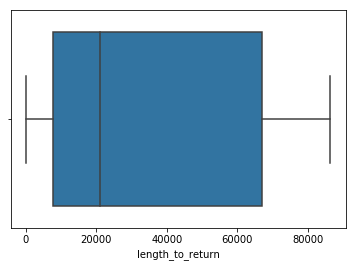

In [124]:
ax = sns.boxplot(x=successful_return['length_to_return'].dt.seconds)

Now that we're done with the typical return process, let's look at other cases.

In [29]:
misrouted = data[data["misrouted"]==1]
not_misrouted = data[data["misrouted"].isnull()]

In [39]:
misrouted.describe()

order_number  misrouted  order_active
count    305.000000      305.0    305.000000
mean   44661.140984        1.0      0.068852
std    20124.075151        0.0      0.253619
min      609.000000        1.0      0.000000
25%    28136.000000        1.0      0.000000
50%    50143.000000        1.0      0.000000
75%    64210.000000        1.0      0.000000
max    73184.000000        1.0      1.000000

In [129]:
misrouted['order_status'].value_counts()

returned                     190
disposed                      60
claims_in_transit             20
claimed                        9
at_sorting_center_rts          8
return_in_transit              4
arrived_at_rts_area            4
arrived_at_claims_area         3
for_return                     3
received_at_delivery_area      1
arrived_at_rts_hub             1
for_claims                     1
delivered                      1
Name: order_status, dtype: int64

In [131]:
misrouted['order_status'].value_counts()/len(misrouted)*100

returned                     62.295082
disposed                     19.672131
claims_in_transit             6.557377
claimed                       2.950820
at_sorting_center_rts         2.622951
return_in_transit             1.311475
arrived_at_rts_area           1.311475
arrived_at_claims_area        0.983607
for_return                    0.983607
received_at_delivery_area     0.327869
arrived_at_rts_hub            0.327869
for_claims                    0.327869
delivered                     0.327869
Name: order_status, dtype: float64

In [40]:
misrouted_inactive = misrouted[misrouted['order_active']==0]
misrouted_inactive['order_status'].value_counts()

returned                  190
disposed                   60
claims_in_transit          20
claimed                     9
arrived_at_claims_area      3
delivered                   1
for_claims                  1
Name: order_status, dtype: int64

After returned, disposed is the most common order status. 1 order was delivered back to the right buyer. As for the rest, the seller filed a claim.  

Are all disposed items misrouted items?

In [133]:
data[data['order_status']=='disposed']

order_number order_status  misrouted  order_active     time_for_return  \
51               52     disposed        NaN             0 2020-06-07 15:06:33   
79               80     disposed        NaN             0 2020-06-08 12:37:47   
826             827     disposed        NaN             0 2020-06-11 11:00:05   
866             867     disposed        1.0             0 2020-06-07 15:06:33   
904             905     disposed        NaN             0 2020-06-06 14:57:05   
...             ...          ...        ...           ...                 ...   
72910         72911     disposed        NaN             0 2020-06-26 17:01:28   
73128         73129     disposed        NaN             0 2020-06-08 16:17:28   
73137         73138     disposed        NaN             0 2020-06-06 05:45:17   
73177         73178     disposed        NaN             0 2020-06-01 11:11:45   
73393         73394     disposed        NaN             0 2020-06-05 14:17:26   

      time_rm_sorting_entry      time_rm_sorted time_rm_sorting_exit  \
51                      NaT                 NaT                  NaT   
79                      NaT 2020-06-09 14:05:41  2020-06-09 14:06:59   
826     2020-06-30 08:15:58 2020-07-01 15:33:29  2020-07-01 15:34:27   
866                     NaT                 NaT                  NaT   
904                     NaT 2020-06-09 14:05:41  2020-06-09 14:06:59   
...                     ...                 ...                  ...   
72910   2020-06-28 14:23:28 2020-06-30 12:17:50  2020-06-30 12:19:04   
73128                   NaT                 NaT                  NaT   
73137                   NaT                 NaT                  NaT   
73177                   NaT                 NaT                  NaT   
73393                   NaT                 NaT                  NaT   

      time_arrived_at_rts_area time_arrived_at_rts_hub time_failed_return  \
51                         NaT                     NaT                NaT   
79         2020-06-09 14:07:54                     NaT                NaT   
826        2020-07-01 15:36:18                     NaT                NaT   
866                        NaT                     NaT                NaT   
904        2020-06-09 14:07:54                     NaT                NaT   
...                        ...                     ...                ...   
72910      2020-06-30 12:19:54                     NaT                NaT   
73128                      NaT                     NaT                NaT   
73137                      NaT                     NaT                NaT   
73177                      NaT                     NaT                NaT   
73393                      NaT                     NaT                NaT   

      time_returned origin_region    origin_province destination_region  \
51              NaT  Metro Manila       Metro Manila       Metro Manila   
79              NaT  Metro Manila       Metro Manila       Metro Manila   
826             NaT   South Luzon             Laguna        South Luzon   
866             NaT      Mindanao      Davao Del Sur       Metro Manila   
904             NaT   North Luzon            Benguet        South Luzon   
...             ...           ...                ...                ...   
72910           NaT   South Luzon              Albay        South Luzon   
73128           NaT  Metro Manila       Metro Manila       Metro Manila   
73137           NaT   South Luzon             Laguna        South Luzon   
73177           NaT   North Luzon            Cagayan        South Luzon   
73393           NaT       Visayas  Negros Occidental       Metro Manila   

      destination_province  
51            Metro Manila  
79            Metro Manila  
826                 Laguna  
866           Metro Manila  
904                 Laguna  
...                    ...  
72910               Laguna  
73128         Metro Manila  
73137               Laguna  
73177               Laguna  
73393         Metro Mani

Nope. 

In [30]:
typical_process = data_sort.merge(successful_return[['order_number', 'order_active',
        'time_arrived_at_rts_area','time_arrived_at_rts_hub', 'time_returned',
       'origin_region', 'origin_province', 'length_time_to_rts_area',
       'length_rts_area_to_hub', 'length_to_return']], on='order_number', how='inner')
typical_process = typical_process.dropna()

In [220]:
len(typical_process) / len(data_inactive) *100

49.243256954426315

In [222]:
len(data_sort) / len(data) *100

87.20558420529846

In [223]:
len(successful_return)/len(data_inactive) *100

81.58169160959386

The number of orders that go through the whole process make up about half the dataset. 
Meanwhile, orders that have gone through sorting make up 87%, and completed orders that have undergone the return process in the origin warehouse make up 81.5%. Only a portion of these go through both sorting and origin warehouse returns. 
So it's worth looking into orders that fall outside these categories.

In [31]:
non_typical = data.drop(index=typical_process.index) 

In [32]:
non_typical = non_typical[non_typical['order_active']==0]

We only want to examine completed orders.

In [228]:
non_typical.head()

order_number order_status  misrouted  order_active     time_for_return  \
156           157     returned        NaN             0 2020-06-09 15:30:55   
183           184     returned        NaN             0 2020-06-06 13:10:01   
194           195     returned        NaN             0 2020-06-06 14:05:08   
202           203     returned        NaN             0 2020-06-10 18:14:45   
204           205     returned        NaN             0 2020-06-10 08:53:17   

    time_rm_sorting_entry      time_rm_sorted time_rm_sorting_exit  \
156                   NaT                 NaT                  NaT   
183                   NaT                 NaT                  NaT   
194   2020-06-07 07:57:27 2020-06-07 09:42:37  2020-06-08 02:20:20   
202   2020-06-11 08:43:02 2020-06-12 08:57:52  2020-06-12 08:58:45   
204   2020-06-12 08:15:57 2020-06-12 18:39:19  2020-06-13 02:26:54   

    time_arrived_at_rts_area time_arrived_at_rts_hub time_failed_return  \
156                      NaT     2020-06-09 22:01:52                NaT   
183                      NaT     2020-06-07 18:19:33                NaT   
194      2020-06-08 10:28:05     2020-06-08 10:34:09                NaT   
202      2020-06-13 04:40:41     2020-06-13 13:13:36                NaT   
204      2020-06-13 12:34:14     2020-06-13 13:55:36                NaT   

          time_returned origin_region origin_province destination_region  \
156 2020-06-12 12:53:23  Metro Manila    Metro Manila       Metro Manila   
183 2020-06-13 10:01:09  Metro Manila    Metro Manila       Metro Manila   
194 2020-06-13 09:50:54  Metro Manila    Metro Manila       Metro Manila   
202 2020-06-17 11:37:28  Metro Manila    Metro Manila       Metro Manila   
204 2020-06-14 11:15:27   North Luzon      Pangasinan       Metro Manila   

    destination_province  
156         Metro Manila  
183         Metro Manila  
194         Metro Manila  
202         Metro Manila  
204         Metro Manila

In [234]:
non_typical.isnull().sum()

order_number                    0
order_status                    0
misrouted                   37141
order_active                    0
time_for_return                 0
time_rm_sorting_entry        4316
time_rm_sorted               3806
time_rm_sorting_exit         3767
time_arrived_at_rts_area     3747
time_arrived_at_rts_hub     15712
time_failed_return          36934
time_returned                3726
origin_region                   0
origin_province                 0
destination_region              0
destination_province            0
dtype: int64

The null values may be due to entry errors. Some items have values for sorted but not for sorted entry.

In [273]:
non_typical[non_typical['time_returned'].isnull()]['order_status'].value_counts()

claims_in_transit         2164
claimed                    697
arrived_at_claims_area     394
disposed                   277
delivered                  139
for_claims                  48
failed_pickup                7
Name: order_status, dtype: int64

In [237]:
non_typical['order_status'].value_counts()

returned                  33587
claims_in_transit          2164
claimed                     698
arrived_at_claims_area      394
disposed                    277
delivered                   139
for_claims                   48
failed_pickup                 7
Name: order_status, dtype: int64

In [238]:
non_typical[non_typical['time_returned'].notnull()]['order_status'].value_counts()

returned    33587
claimed         1
Name: order_status, dtype: int64

In [239]:
typical_process['order_status'].value_counts()

returned    34944
Name: order_status, dtype: int64

Inactive orders with no time_returned all have to do with claims, failed pickups and disposed items.

In [33]:
non_typical = non_typical[non_typical['time_returned'].notnull()]

In [275]:
non_typical['order_status'].value_counts()

returned    33587
claimed         1
Name: order_status, dtype: int64

In [278]:
non_typical.isnull().sum()

order_number                    0
order_status                    0
misrouted                   33483
order_active                    0
time_for_return                 0
time_rm_sorting_entry        3486
time_rm_sorted               3114
time_rm_sorting_exit         3082
time_arrived_at_rts_area     3032
time_arrived_at_rts_hub     12169
time_failed_return          33251
time_returned                   0
origin_region                   0
origin_province                 0
destination_region              0
destination_province            0
dtype: int64

After time for return, what next timestep does the order take?

In [34]:
non_typical['diff_sorting_entry'] = non_typical['time_rm_sorting_entry'].sub(non_typical['time_for_return'], axis=0)

In [35]:
non_typical['diff_sorted'] = non_typical['time_rm_sorted'].sub(non_typical['time_for_return'], axis=0)
non_typical['diff_sorting_exit'] = non_typical['time_rm_sorting_exit'].sub(non_typical['time_for_return'], axis=0)
non_typical['diff_rts_area'] = non_typical['time_arrived_at_rts_area'].sub(non_typical['time_for_return'], axis=0)
non_typical['diff_rts_hub'] = non_typical['time_arrived_at_rts_hub'].sub(non_typical['time_for_return'], axis=0)
non_typical['diff_return'] = non_typical['time_returned'].sub(non_typical['time_for_return'], axis=0)

Check for negative values

In [36]:
time_diff_cols = ['diff_sorting_entry', 'diff_sorted',
       'diff_sorting_exit', 'diff_rts_area', 'diff_rts_hub', 'diff_return']

In [48]:
non_typical[non_typical['diff_sorting_entry']< datetime.timedelta(0, 0, 0)]

order_number order_status  misrouted  order_active     time_for_return  \
65486         65487     returned        NaN             0 2020-06-26 13:52:15   

      time_rm_sorting_entry      time_rm_sorted time_rm_sorting_exit  \
65486   2020-06-18 14:02:39 2020-06-18 18:30:50  2020-06-18 23:29:24   

      time_arrived_at_rts_area time_arrived_at_rts_hub  ... origin_region  \
65486      2020-07-01 03:24:12     2020-06-19 05:04:22  ...   North Luzon   

      origin_province destination_region destination_province  \
65486          Tarlac        North Luzon             Pampanga   

      diff_sorting_entry       diff_sorted diff_sorting_exit   diff_rts_area  \
65486  -8 days +00:10:24 -8 days +04:38:35 -8 days +09:37:09 4 days 13:31:57   

           diff_rts_hub     diff_return  
65486 -8 days +15:12:07 4 days 20:43:08  

[1 rows x 22 columns]

In [37]:
for col in time_diff_cols:
    non_typical[non_typical[col] < datetime.timedelta(0, 0, 0)] = None

In [38]:
non_typical['closest'] = non_typical[['diff_sorting_entry', 'diff_sorted',
       'diff_sorting_exit', 'diff_rts_area', 'diff_rts_hub', 'diff_return']].idxmin(axis="columns")

In [39]:
non_typical['closest'].value_counts()

diff_sorting_entry    30087
diff_rts_hub           3038
diff_sorted             406
diff_rts_area            56
Name: closest, dtype: int64

Most immediately go to sorting_entry. We'll ignore this for now since this was already calculated when analyzing data_sorted earlier. 

In [340]:
(3038+56)/len(data_inactive)*100

4.360080042839829

In [346]:
406/len(data_inactive)*100

0.5721372001916519

3094 go from the destination warehouse straight to the origin warehouse.

In [343]:
non_typical[non_typical['closest']=='diff_rts_hub']['diff_rts_hub'].describe()

count                      3038
mean     0 days 11:06:31.041474
std      1 days 05:59:41.931361
min             0 days 00:00:06
25%      0 days 02:00:33.750000
50%             0 days 04:14:00
75%      0 days 06:32:40.250000
max            27 days 07:16:01
Name: diff_rts_hub, dtype: object

In [344]:
non_typical[non_typical['closest']=='diff_rts_area']['diff_rts_area'].describe()

count                        56
mean     3 days 09:40:55.392857
std      4 days 13:34:53.570699
min             0 days 14:28:51
25%      0 days 14:30:14.250000
50%             1 days 06:30:51
75%      3 days 00:57:07.250000
max            18 days 23:49:31
Name: diff_rts_area, dtype: object

In [345]:
non_typical[non_typical['closest']=='diff_sorted']

order_number order_status  misrouted  order_active     time_for_return  \
254           255.0     returned        NaN           0.0 2020-06-08 15:44:57   
259           260.0     returned        NaN           0.0 2020-06-07 15:00:56   
261           262.0     returned        NaN           0.0 2020-06-07 17:50:57   
307           308.0     returned        NaN           0.0 2020-06-08 14:59:52   
357           358.0     returned        NaN           0.0 2020-06-08 18:23:18   
...             ...          ...        ...           ...                 ...   
69336       69337.0     returned        NaN           0.0 2020-06-06 17:27:08   
71614       71615.0     returned        NaN           0.0 2020-06-26 19:23:23   
72372       72373.0     returned        NaN           0.0 2020-06-08 12:37:47   
73076       73077.0     returned        NaN           0.0 2020-06-04 19:36:49   
73254       73255.0     returned        NaN           0.0 2020-06-06 18:15:53   

      time_rm_sorting_entry      time_rm_sorted time_rm_sorting_exit  \
254                     NaT 2020-06-09 09:01:12  2020-06-10 02:43:35   
259                     NaT 2020-06-09 08:32:08  2020-06-10 01:22:41   
261                     NaT 2020-06-09 08:48:35  2020-06-10 01:22:41   
307                     NaT 2020-06-09 08:58:19  2020-06-10 01:22:41   
357                     NaT 2020-06-09 09:00:56  2020-06-10 01:22:41   
...                     ...                 ...                  ...   
69336                   NaT 2020-06-09 08:37:18  2020-06-10 23:21:45   
71614   2020-07-13 14:05:33 2020-07-01 14:17:49  2020-07-01 14:18:46   
72372                   NaT 2020-06-09 09:01:02  2020-06-10 04:09:15   
73076                   NaT 2020-06-09 08:59:00  2020-06-09 16:19:56   
73254                   NaT 2020-06-09 08:49:24  2020-06-10 23:21:45   

      time_arrived_at_rts_area time_arrived_at_rts_hub  ...  origin_province  \
254        2020-06-10 04:59:07     2020-06-10 05:08:18  ...     Metro Manila   
259        2020-06-17 11:09:31     2020-06-17 11:11:16  ...     Metro Manila   
261        2020-06-16 13:48:52     2020-06-16 13:57:43  ...     Metro Manila   
307        2020-06-18 12:58:26     2020-06-18 16:06:47  ...     Metro Manila   
357        2020-06-19 09:53:34                     NaT  ...     Metro Manila   
...                        ...                     ...  ...              ...   
69336      2020-06-11 16:12:53     2020-06-13 18:10:03  ...          Benguet   
71614      2020-07-14 06:06:07                     NaT  ...  Camarines Norte   
72372      2020-06-10 07:26:28     2020-06-10 07:27:45  ...     Metro Manila   
73076      2020-06-16 15:10:55     2020-06-16 15:11:57  ...     Metro Manila   
73254      2020-06-11 16:13:19     2020-06-13 18:10:03  ...          Benguet   

      destination_region destination_province diff_sorting_entry  \
254         Metro Manila         Metro Manila                NaT   
259         Metro Manila         Metro Manila                NaT   
261         Metro Manila         Metro Manila                NaT   
307         Metro Manila         Metro Manila                NaT   
357         Metro Manila         Metro Manila                NaT   
...                  ...                  ...                ...   
69336        South Luzon               Laguna                NaT   
71614       Metro Manila         Metro Manila   16 days 18:42:10   
72372        North Luzon             Pampanga                NaT   
73076           Mindanao        Davao Del Sur                NaT   
73254        South Luzon               Laguna                NaT   

          diff_sorted diff_sorting_exit    diff_rts_area     diff_rts_hub  \
254   0 days 17:16:15   1 days 10:58:38  1 days 13:14:10  1 days 13:23:21   
259   1 days 17:31:12   2 days 10:21:45  9 days 20:08:35  9 days 20:10:20   
261   1 days 14:57:38   2 days 07:31:44  8 days 19:57:55  8 days 20:06:46   
307   0 days 17:58:27   1 days 10:22:49  9 days 21:58:34 10 days 01:06:55   
357   

In [40]:
misrouted_corr = typical_process.merge(data[['order_number','misrouted']], on='order_number')
print(len(misrouted_corr))
print(len(typical_process))

34944
34944


In [41]:
misrouted_corr['misrouted'] = misrouted_corr['misrouted'].fillna(0)

In [42]:
cols_to_cor = ['length_in_sorting_facility', 'length_sorting', 'length_after_sorting', 
               'length_time_to_rts_area', 'length_rts_area_to_hub', 'length_to_return']
for col in cols_to_cor:
    misrouted_corr[col] =  misrouted_corr[col].dt.seconds

In [43]:
misrouted_corr

order_number     time_for_return time_rm_sorting_entry  \
0                54 2020-06-06 15:42:36   2020-06-07 08:03:12   
1                55 2020-06-06 18:34:31   2020-06-07 08:03:12   
2                56 2020-06-06 18:59:40   2020-06-07 08:02:57   
3                57 2020-06-06 18:56:47   2020-06-07 07:57:27   
4                58 2020-06-06 11:46:24   2020-06-07 08:02:53   
...             ...                 ...                   ...   
34939         73486 2020-06-01 20:48:08   2020-06-06 07:35:05   
34940         73488 2020-06-02 16:14:28   2020-06-13 13:18:51   
34941         73489 2020-06-02 16:14:28   2020-06-13 13:18:51   
34942         73490 2020-06-05 17:35:17   2020-06-13 13:19:10   
34943         73491 2020-06-02 16:14:28   2020-06-13 13:18:36   

           time_rm_sorted time_rm_sorting_exit destination_region  \
0     2020-06-07 09:46:16  2020-06-08 02:38:31       Metro Manila   
1     2020-06-07 09:48:27  2020-06-08 02:08:54       Metro Manila   
2     2020-06-07 09:39:28  2020-06-08 02:08:54       Metro Manila   
3     2020-06-07 09:36:27  2020-06-08 02:08:54       Metro Manila   
4     2020-06-07 09:48:50  2020-06-08 02:36:03        South Luzon   
...                   ...                  ...                ...   
34939 2020-06-06 12:39:18  2020-06-07 02:34:46       Metro Manila   
34940 2020-06-13 20:07:48  2020-06-14 04:43:01       Metro Manila   
34941 2020-06-13 18:23:15  2020-06-14 01:53:18       Metro Manila   
34942 2020-06-13 20:05:57  2020-06-14 03:14:23       Metro Manila   
34943 2020-06-13 20:05:49  2020-06-14 03:14:23       Metro Manila   

      destination_province order_status  length_return_to_sorting_entry  \
0             Metro Manila     returned                           58836   
1             Metro Manila     returned                           48521   
2             Metro Manila     returned                           46997   
3             Metro Manila     returned                           46840   
4                   Cavite     returned                           72989   
...                    ...          ...                             ...   
34939         Metro Manila     returned                           38817   
34940         Metro Manila     returned                           75863   
34941         Metro Manila     returned                           75863   
34942         Metro Manila     returned                           71033   
34943         Metro Manila     returned                           75848   

       length_in_sorting_facility  ...  order_active  \
0                           66919  ...             0   
1                           65142  ...             0   
2                           65157  ...             0   
3                           65487  ...             0   
4                           66790  ...             0   
...                           ...  ...           ...   
34939                       68381  ...             0   
34940                       55450  ...             0   
34941                       45267  ...             0   
34942                       50113  ...             0   
34943                       50147  ...             0   

       time_arrived_at_rts_area  time_arrived_at_rts_hub       time_returned  \
0           2020-06-08 05:45:12      2020-06-08 06:07:29 2020-06-08 12:19:43   
1           2020-06-08 04:23:38      2020-06-08 04:48:00 2020-06-08 13:19:56   
2           2020-06-08 04:23:35      2020-06-08 04:51:33 2020-06-08 11:08:06   
3           2020-06-08 04:23:39      2020-06-08 05:12:12 2020-06-08 12:26:03   
4           2020-06-08 04:10:44      2020-06-08 04:18:27 2020-06-08 09:16:45   
...                         ...                      ...                 ...   
34939       2020-06-07 04:24:40      2020-06-07 04:40:38 2020-06-07 10:53:44   
34940       2020-06-15 13:05:30      2020-06-15 13:29:21 2020-06-20 12:47:23   
34941       2020-06-14 11:59:44      2020-06-14 12:17:25 2020-06-15 15:57:19   
34942       2020-06-14 

In [44]:
for col in cols_to_cor:
    print("\n", col, ": ",misrouted_corr['misrouted'].corr(misrouted_corr[col])) 


 length_return_to_sorting_entry :  -0.014570147113984256

 length_in_sorting_facility :  -0.03664829635493341

 length_sorting :  0.013352411812504131

 length_after_sorting :  -0.051791941210398214

 length_time_to_rts_area :  0.010215526941656889

 length_rts_area_to_hub :  -0.020645288532887218

 length_to_return :  -0.01040924116489504


There's no correlation with misrouted orders and the time in between return process steps.

Let's look at orders with that weren't returned.

In [45]:
not_returned = data_inactive[data_inactive['time_returned'].isnull()]

In [46]:
not_returned['order_status'].value_counts()

claims_in_transit         4394
claimed                   1413
arrived_at_claims_area     862
disposed                   471
delivered                  271
for_claims                 102
failed_pickup                8
Name: order_status, dtype: int64

In [47]:
data_inactive['order_status'].value_counts()

returned                  63439
claims_in_transit          4394
claimed                    1415
arrived_at_claims_area      862
disposed                    471
delivered                   271
for_claims                  102
failed_pickup                 8
Name: order_status, dtype: int64

Orders with no time returned value have to do with claims.

In [48]:
len(not_returned)/len(data_inactive)*100

10.598630252811365

In [49]:
not_returned

order_number            order_status  misrouted  order_active  \
0                 1       claims_in_transit        NaN             0   
1                 2       claims_in_transit        NaN             0   
2                 3       claims_in_transit        NaN             0   
4                 5  arrived_at_claims_area        NaN             0   
5                 6       claims_in_transit        NaN             0   
...             ...                     ...        ...           ...   
73397         73398               delivered        NaN             0   
73422         73423               delivered        NaN             0   
73437         73438                 claimed        NaN             0   
73465         73466               delivered        NaN             0   
73491         73492       claims_in_transit        NaN             0   

          time_for_return time_rm_sorting_entry      time_rm_sorted  \
0     2020-06-20 15:00:52   2020-07-03 08:23:32 2020-07-03 13:10:56   
1     2020-06-20 21:26:40   2020-07-04 13:36:17 2020-07-04 13:59:24   
2     2020-06-19 17:32:52   2020-07-02 07:03:00 2020-07-02 09:20:42   
4     2020-06-17 18:13:22   2020-07-01 10:50:49 2020-07-01 19:19:56   
5     2020-06-17 00:00:59   2020-06-29 18:08:17 2020-06-29 18:45:07   
...                   ...                   ...                 ...   
73397 2020-06-01 16:57:14                   NaT                 NaT   
73422 2020-06-01 21:24:13                   NaT                 NaT   
73437 2020-06-02 16:13:51   2020-06-11 08:52:15                 NaT   
73465 2020-06-01 16:38:52                   NaT                 NaT   
73491 2020-06-15 17:22:27   2020-06-21 18:06:03 2020-06-21 20:01:27   

      time_rm_sorting_exit time_arrived_at_rts_area time_arrived_at_rts_hub  \
0      2020-07-04 00:44:07      2020-07-06 08:04:20                     NaT   
1      2020-07-07 02:25:25      2020-07-09 09:34:30                     NaT   
2      2020-07-04 00:46:15      2020-07-08 13:55:59                     NaT   
4      2020-07-02 00:48:18      2020-07-05 13:03:48                     NaT   
5      2020-06-30 01:34:46      2020-07-11 13:29:15                     NaT   
...                    ...                      ...                     ...   
73397                  NaT                      NaT                     NaT   
73422                  NaT                      NaT                     NaT   
73437                  NaT                      NaT                     NaT   
73465                  NaT                      NaT                     NaT   
73491  2020-06-21 20:02:21      2020-07-03 11:39:49                     NaT   

      time_failed_return time_returned origin_region    origin_province  \
0                    NaT           NaT      Mindanao           Bukidnon   
1                    NaT           NaT      Mindanao   Agusan Del Norte   
2                    NaT           NaT      Mindanao  Zamboanga Del Sur   
4                    NaT           NaT       Visayas               Cebu   
5                    NaT           NaT       Visayas             Iloilo   
...                  ...           ...           ...                ...   
73397                NaT           NaT      Mindanao     South Cotabato   
73422                NaT           NaT      Mindanao   Misamis Oriental   
73437                NaT           NaT      Mindanao  Zamboanga Del Sur   
73465                NaT           NaT      Mindanao     South Cotabato   
73491                NaT           NaT       Visayas               Cebu   

      destination_region destination_province  
0            South Luzon               Laguna  
1            South Luzon               Laguna  
2            South Luzon               Laguna  
4            South Luzon               Laguna  
5           Metro Manila         Metro Manila  
...                  ...                  ...  
73397       Metro Manila         Metro Manila  
73422       Metro Manila         Metro Manila  
73437  

In [50]:
not_returned['diff_sorting_entry'] = not_returned['time_rm_sorting_entry'].sub(not_returned['time_for_return'], axis=0)
not_returned['diff_sorted'] = not_returned['time_rm_sorted'].sub(not_returned['time_for_return'], axis=0)
not_returned['diff_sorting_exit'] = not_returned['time_rm_sorting_exit'].sub(not_returned['time_for_return'], axis=0)
not_returned['diff_rts_area'] = not_returned['time_arrived_at_rts_area'].sub(not_returned['time_for_return'], axis=0)
not_returned['diff_rts_hub'] = not_returned['time_arrived_at_rts_hub'].sub(not_returned['time_for_return'], axis=0)
not_returned['diff_fail_return'] = not_returned['time_failed_return'].sub(not_returned['time_for_return'], axis=0)

/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [51]:
nr_time_diff_cols = ['diff_sorting_entry', 'diff_sorted',
       'diff_sorting_exit', 'diff_rts_area', 'diff_rts_hub', 'diff_fail_return']
for col in nr_time_diff_cols:
    not_returned[not_returned[col] < datetime.timedelta(0, 0, 0)] = None

/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/isa/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [53]:
not_returned['closest'] = not_returned[nr_time_diff_cols].idxmin(axis="columns")

/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
not_returned['closest'].value_counts()

diff_sorting_entry    5911
diff_sorted            405
diff_rts_hub           180
diff_rts_area           19
Name: closest, dtype: int64

XPOST adheres to resolving filed claims within 5 business days. Approved claims will be paid within 7 business days from the date of approval. 

If an item is not delivered within 7 days from the time you received a notification that it is in transit, you may file a claim for loss within 7 days from discovery of loss.

Let's see if these are followed.

In [55]:
claims = not_returned[not_returned['order_status'].value]

order_number            order_status  misrouted  order_active  \
0               1.0       claims_in_transit        NaN           0.0   
1               2.0       claims_in_transit        NaN           0.0   
2               3.0       claims_in_transit        NaN           0.0   
4               5.0  arrived_at_claims_area        NaN           0.0   
5               6.0       claims_in_transit        NaN           0.0   
...             ...                     ...        ...           ...   
73397       73398.0               delivered        NaN           0.0   
73422       73423.0               delivered        NaN           0.0   
73437       73438.0                 claimed        NaN           0.0   
73465       73466.0               delivered        NaN           0.0   
73491       73492.0       claims_in_transit        NaN           0.0   

          time_for_return time_rm_sorting_entry      time_rm_sorted  \
0     2020-06-20 15:00:52   2020-07-03 08:23:32 2020-07-03 13:10:56   
1     2020-06-20 21:26:40   2020-07-04 13:36:17 2020-07-04 13:59:24   
2     2020-06-19 17:32:52   2020-07-02 07:03:00 2020-07-02 09:20:42   
4     2020-06-17 18:13:22   2020-07-01 10:50:49 2020-07-01 19:19:56   
5     2020-06-17 00:00:59   2020-06-29 18:08:17 2020-06-29 18:45:07   
...                   ...                   ...                 ...   
73397 2020-06-01 16:57:14                   NaT                 NaT   
73422 2020-06-01 21:24:13                   NaT                 NaT   
73437 2020-06-02 16:13:51   2020-06-11 08:52:15                 NaT   
73465 2020-06-01 16:38:52                   NaT                 NaT   
73491 2020-06-15 17:22:27   2020-06-21 18:06:03 2020-06-21 20:01:27   

      time_rm_sorting_exit time_arrived_at_rts_area time_arrived_at_rts_hub  \
0      2020-07-04 00:44:07      2020-07-06 08:04:20                     NaT   
1      2020-07-07 02:25:25      2020-07-09 09:34:30                     NaT   
2      2020-07-04 00:46:15      2020-07-08 13:55:59                     NaT   
4      2020-07-02 00:48:18      2020-07-05 13:03:48                     NaT   
5      2020-06-30 01:34:46      2020-07-11 13:29:15                     NaT   
...                    ...                      ...                     ...   
73397                  NaT                      NaT                     NaT   
73422                  NaT                      NaT                     NaT   
73437                  NaT                      NaT                     NaT   
73465                  NaT                      NaT                     NaT   
73491  2020-06-21 20:02:21      2020-07-03 11:39:49                     NaT   

       ...    origin_province destination_region destination_province  \
0      ...           Bukidnon        South Luzon               Laguna   
1      ...   Agusan Del Norte        South Luzon               Laguna   
2      ...  Zamboanga Del Sur        South Luzon               Laguna   
4      ...               Cebu        South Luzon               Laguna   
5      ...             Iloilo       Metro Manila         Metro Manila   
...    ...                ...                ...                  ...   
73397  ...     South Cotabato       Metro Manila         Metro Manila   
73422  ...   Misamis Oriental       Metro Manila         Metro Manila   
73437  ...  Zamboanga Del Sur       Metro Manila         Metro Manila   
73465  ...     South Cotabato       Metro Manila         Metro Manila   
73491  ...               Cebu        South Luzon               Laguna   

      diff_sorting_entry      diff_sorted diff_sorting_exit    diff_rts_area  \
0       12 days 17:22:40 12 days 22:10:04  13 days 09:43:15 15 days 17:03:28   
1       13 days 16:09:37 13 days 16:32:44  16 days 04:58:45 18 days 12:07:50   
2       12 days 13:30:08 12 days 15:47:50  14 days 07:13:23 18 days 20:23:07   
4       13 days 16:37:27 14 days 01:06:34  14 days 06:34:56 17 days 18:50:26   
5       12 days 18:07:18 12 days 18:44:08  13 days 01:33:47 24 

In [61]:
claims = not_returned[not_returned['order_status'].isin(['claims_in_transit', 'claimed', 'arrived_at_claims_area','for_claims'])]

In [63]:
claims['closest'].value_counts()

diff_sorting_entry    5848
diff_sorted            400
diff_rts_hub           180
diff_rts_area           18
Name: closest, dtype: int64

In [68]:
claims['furthest'] = claims[nr_time_diff_cols].idxmax(axis="columns")
claims['furthest_value'] = claims[nr_time_diff_cols].max(axis="columns")

/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
claims['furthest'].value_counts()

diff_rts_area         5902
diff_rts_hub           282
diff_sorting_entry     104
diff_fail_return        85
diff_sorting_exit       72
diff_sorted              1
Name: furthest, dtype: int64

In [70]:
claims['furthest_value'].describe()

count                       6446
mean     17 days 03:18:27.065466
std       7 days 13:39:42.061196
min              0 days 00:00:17
25%      12 days 14:13:03.500000
50%             16 days 17:19:16
75%             21 days 14:05:04
max             42 days 01:07:41
Name: furthest_value, dtype: object

In [71]:
claims['order_status'].value_counts()

claims_in_transit         4394
claimed                   1413
arrived_at_claims_area     862
for_claims                 102
Name: order_status, dtype: int64

In [72]:
claims[claims['order_status']=='claims_in_transit']['furthest'].value_counts()

diff_rts_area       4336
diff_fail_return       4
Name: furthest, dtype: int64

In [74]:
claims[claims['order_status']=='claims_in_transit']['furthest_value'].describe()

count                       4340
mean     18 days 06:34:30.983179
std       7 days 01:52:17.656811
min              1 days 08:43:41
25%      13 days 11:44:21.500000
50%      17 days 18:41:33.500000
75%      22 days 14:03:24.500000
max             42 days 01:07:41
Name: furthest_value, dtype: object

Most claims in transit take about 17 days to arrive from the destination warehouse to the origin warehouse. 

[Text(0, 0.5, 'Claims in Transit'), Text(0.5, 0, 'Days')]

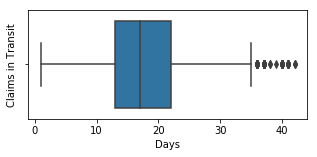

In [78]:
plt.figure(figsize=(5,2))
ax = sns.boxplot(x=claims[claims['order_status']=='claims_in_transit']['furthest_value'].dt.days)
ax.set(xlabel='Days', ylabel='Claims in Transit')

In [79]:
claims[claims['order_status']=='claimed']['furthest'].value_counts()

diff_rts_area         665
diff_rts_hub          282
diff_sorting_entry    104
diff_sorting_exit      72
diff_fail_return       57
diff_sorted             1
Name: furthest, dtype: int64

In [80]:
claims[claims['order_status']=='claimed']['furthest_value'].describe()

count                       1181
mean     11 days 03:40:11.469940
std       6 days 23:12:32.174887
min              0 days 00:00:17
25%              4 days 18:21:13
50%             12 days 16:06:32
75%             15 days 19:24:11
max             34 days 18:06:49
Name: furthest_value, dtype: object

[Text(0, 0.5, 'Claimed'), Text(0.5, 0, 'Days')]

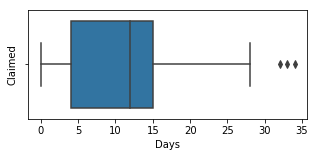

In [81]:
plt.figure(figsize=(5,2))
ax = sns.boxplot(x=claims[claims['order_status']=='claimed']['furthest_value'].dt.days)
ax.set(xlabel='Days', ylabel='Claimed')

In [82]:
claims[claims['order_status']=='arrived_at_claims_area']['furthest'].value_counts()

diff_rts_area       850
diff_fail_return      4
Name: furthest, dtype: int64

In [83]:
claims[claims['order_status']=='arrived_at_claims_area']['furthest_value'].describe()

count                        854
mean     19 days 04:27:42.106557
std       6 days 08:13:13.300913
min              1 days 19:52:44
25%             15 days 15:51:28
50%             16 days 21:40:46
75%      21 days 17:34:11.500000
max             38 days 01:22:58
Name: furthest_value, dtype: object

[Text(0, 0.5, 'Arrived at Claims Area'), Text(0.5, 0, 'Days')]

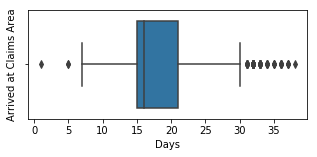

In [84]:
plt.figure(figsize=(5,2))
ax = sns.boxplot(x=claims[claims['order_status']=='arrived_at_claims_area']['furthest_value'].dt.days)
ax.set(xlabel='Days', ylabel='Arrived at Claims Area')

In [85]:
claims[claims['order_status']=='for_claims']['furthest'].value_counts()

diff_rts_area       51
diff_fail_return    20
Name: furthest, dtype: int64

In [86]:
claims[claims['order_status']=='for_claims']['furthest_value'].describe()

count                         71
mean     22 days 14:31:25.802816
std       9 days 18:28:11.226236
min              3 days 18:17:11
25%             15 days 05:43:28
50%             21 days 15:06:27
75%             31 days 03:38:33
max             37 days 22:48:44
Name: furthest_value, dtype: object

[Text(0, 0.5, 'For Claims'), Text(0.5, 0, 'Days')]

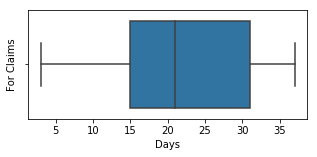

In [87]:
plt.figure(figsize=(5,2))
ax = sns.boxplot(x=claims[claims['order_status']=='for_claims']['furthest_value'].dt.days)
ax.set(xlabel='Days', ylabel='For Claims')

In [88]:
claims['furthest'].value_counts()

diff_rts_area         5902
diff_rts_hub           282
diff_sorting_entry     104
diff_fail_return        85
diff_sorting_exit       72
diff_sorted              1
Name: furthest, dtype: int64

In [89]:
claims['furthest_value'].describe()

count                       6446
mean     17 days 03:18:27.065466
std       7 days 13:39:42.061196
min              0 days 00:00:17
25%      12 days 14:13:03.500000
50%             16 days 17:19:16
75%             21 days 14:05:04
max             42 days 01:07:41
Name: furthest_value, dtype: object

[Text(0, 0.5, 'Claims'), Text(0.5, 0, 'Days')]

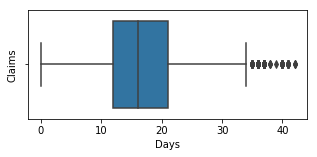

In [90]:
plt.figure(figsize=(5,2))
ax = sns.boxplot(x=claims['furthest_value'].dt.days)
ax.set(xlabel='Days', ylabel='Claims')

Assuming time_return is the time when a claim is approved, and a claim is filed on a Friday...

Half of the orders don't meet the policy requirement.

In [91]:
formatted_claims = claims
formatted_claims['furthest_value'] = formatted_claims['furthest_value'].dt.days

/home/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0.5, 'Order Status'), Text(0.5, 0, 'Days')]

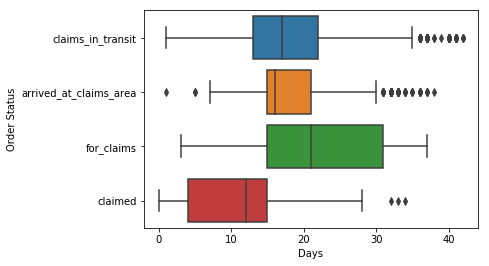

In [93]:
ax = sns.boxplot(data = formatted_claims, x='furthest_value', y ='order_status')
ax.set(xlabel='Days', ylabel='Order Status')